# Star Hotels

## Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

 

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

 

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

## Data Dictionary
* **no_of_adults**: Number of adults
* **no_of_children**: Number of Children
* **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan**: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels Group
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year**: Year of arrival date
* **arrival_month**: Month of arrival date
* **arrival_date**: Date of the month
* **market_segment_type**: Market segment designation.
* **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status**: Flag indicating if the booking was canceled or not.

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Load the data and check the shape/info

In [2]:
# read the data
data = pd.read_csv("StarHotelsGroup.csv")
# make a copy of the dataset so that we do not
df = data.copy()
# view a random sample of the dataset
df.sample(n=10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
24011             2               0                     1                  3   
30286             2               0                     1                  2   
12581             3               0                     0                  3   
54070             2               0                     0                  4   
30459             2               0                     0                  3   
26338             2               0                     1                  2   
46616             2               0                     0                  1   
22037             3               0                     1                  0   
28982             1               0                     0                  3   
50005             2               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
24011       Meal Plan 1                           0        Room_Type 1   
30286       Meal Plan 1                           0        Room_Type 1   
12581       Meal Plan 1                           0        Room_Type 4   
54070       Meal Plan 1                           0        Room_Type 4   
30459       Meal Plan 1                           0        Room_Type 1   
26338       Meal Plan 1                           0        Room_Type 1   
46616      Not Selected                           0        Room_Type 1   
22037       Meal Plan 1                           0        Room_Type 4   
28982       Meal Plan 1                           0        Room_Type 4   
50005       Meal Plan 1                           0        Room_Type 4   

       lead_time  arrival_year  arrival_month  arrival_date  \
24011         17          2018             12             8   
30286        305          2018             11             4   
12581        246          2019              3            16   
54070          4          2018              5            31   
30459        213          2018              6             7   
26338        305          2018             11             4   
46616        182          2018             10            12   
22037        133          2018             10            10   
28982         67          2018              5            31   
50005         22          2019              2            17   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
24011              Online               0                             0   
30286             Offline               0                             0   
12581              Online               0                             0   
54070              Online               0                             0   
30459             Offline               0                             0   
26338             Offline               0                             0   
46616              Online               0                             0   
22037              Online               0                             0   
28982              Online               0                             0   
50005              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
24011                                     0               91.38   
30286                                     0               89.00   
12581                                     0              122.40   
54070                                     0              132.08   
30459                                     0              130.00   
26338                                     0               89.00   
46616                                     0               98.10   
22037                                     0              151.20   
28982                                     0              140.40   
50005                                     0              118.00   

       no_of_special_requests booking_status  
24011 

<IPython.core.display.Javascript object>

In [3]:
# view shape of dataset
df.shape

(56926, 18)

<IPython.core.display.Javascript object>

In [4]:
# view info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [5]:
# double check for null values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are 56926 rows and 18 columns.
* No missing values
* Most of the columns are int or float. 
* Some columns are coded as int but are essentially binary
* There are a few object columns that will need to be recoded

## Exploratory Data Analysis (EDA)

In [6]:
# check to make sure all rows are valid/meaningful
# create dataframe with only bookings of no nights
df_no_nights = df[(df["no_of_weekend_nights"] == 0) & (df["no_of_week_nights"] == 0)]
df_no_nights.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
324              1               0                     0                  0   
399              1               0                     0                  0   
1795             2               0                     0                  0   
2159             3               0                     0                  0   
2971             2               0                     0                  0   

     type_of_meal_plan  required_car_parking_space room_type_reserved  \
324        Meal Plan 1                           0        Room_Type 1   
399        Meal Plan 1                           0        Room_Type 1   
1795       Meal Plan 1                           0        Room_Type 1   
2159       Meal Plan 1                           0        Room_Type 4   
2971       Meal Plan 2                           0        Room_Type 1   

      lead_time  arrival_year  arrival_month  arrival_date  \
324           4          2018              2            27   
399          23          2019              1            11   
1795        145          2018              7             5   
2159         57          2018              4             1   
2971        247          2018              6             6   

     market_segment_type  repeated_guest  no_of_previous_cancellations  \
324        Complementary               0                             0   
399               Online               0                             0   
1795              Online               0                             0   
2159              Online               0                             0   
2971              Online               0                             0   

      no_of_previous_bookings_not_canceled  avg_price_per_room  \
324                                      0                 0.0   
399                                      0                 0.0   
1795                                     0                 0.0   
2159                                     0                 0.0   
2971                                     0                 0.0   

      no_of_special_requests booking_status  
324                        1   Not_Canceled  
399                        2   Not_Canceled  
1795                       1   Not_Canceled  
2159                       2   Not_Canceled  
2971                       1   Not_Canceled

<IPython.core.display.Javascript object>

In [7]:
df_no_nights.shape

(102, 18)

<IPython.core.display.Javascript object>

* There are 102 rows that have zero weekend nights and zero week nights. These may be due to data entry error or some promotion. We will consider it as error in data entry and remove it from our dataset

In [8]:
# exclude bookings with no nights from the dataframe
df = df[(df["no_of_weekend_nights"] > 0) | (df["no_of_week_nights"] > 0)]
df.shape

(56824, 18)

<IPython.core.display.Javascript object>

In [9]:
# check for duplicate rows
df.duplicated().sum()

14347

<IPython.core.display.Javascript object>

In [10]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [11]:
# check shape of dataset to make sure duplicate rows have been removed
df.shape

(42477, 18)

<IPython.core.display.Javascript object>

In [12]:
# check descriptive statistics of the data
df.describe(include="all").T

count unique           top   freq  \
no_of_adults                          42477.0    NaN           NaN    NaN   
no_of_children                        42477.0    NaN           NaN    NaN   
no_of_weekend_nights                  42477.0    NaN           NaN    NaN   
no_of_week_nights                     42477.0    NaN           NaN    NaN   
type_of_meal_plan                       42477      4   Meal Plan 1  31792   
required_car_parking_space            42477.0    NaN           NaN    NaN   
room_type_reserved                      42477      7   Room_Type 1  29652   
lead_time                             42477.0    NaN           NaN    NaN   
arrival_year                          42477.0    NaN           NaN    NaN   
arrival_month                         42477.0    NaN           NaN    NaN   
arrival_date                          42477.0    NaN           NaN    NaN   
market_segment_type                     42477      5        Online  34086   
repeated_guest                        42477.0    NaN           NaN    NaN   
no_of_previous_cancellations          42477.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  42477.0    NaN           NaN    NaN   
avg_price_per_room                    42477.0    NaN           NaN    NaN   
no_of_special_requests                42477.0    NaN           NaN    NaN   
booking_status                          42477      2  Not_Canceled  27992   

                                             mean        std     min     25%  \
no_of_adults                             1.917367   0.527383     0.0     2.0   
no_of_children                           0.142242   0.460068     0.0     0.0   
no_of_weekend_nights                     0.897356   0.887845     0.0     0.0   
no_of_week_nights                        2.326577   1.516955     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.034442   0.182364     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               77.397627  77.280895     0.0    16.0   
arrival_year                          2018.298538   0.625848  2017.0  2018.0   
arrival_month                            6.365421   3.050004     1.0     4.0   
arrival_date                            15.684535   8.814081     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                            0.03077   0.172695     0.0     0.0   
no_of_previous_cancellations             0.025426   0.358547     0.0     0.0   
no_of_previous_bookings_not_canceled     0.222921   2.244717     0.0     0.0   
avg_price_per_room                     112.637711  40.551351     0.0    85.5   
no_of_special_requests                   0.768369   0.837487     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     8.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               53.0   118.0   521.0  
arrival_year                          2018.0  2019.0  2019.0  
arrival_month                            6.0     9.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest                           0.0     0.0     1.0  
no_of_previous_cancellations             0.0     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.0    72.0  
avg_price_per_room                    107.03   

<IPython.core.display.Javascript object>

* There are 4 types of meal plans
* There are 7 types of rooms
* There are 5 market segments, the most popular of which, by far, is online
* More than half bookings are not canceled, but a fairly large proportion are canceled
* Most bookings have 2 adults, but there are some with 0 adults and some up to 4
* At least 75% of bookings have 0 children, but there are some with up to 10
* At least 75% of bookings have up to 3 week nights
* Max week nights is 17, which indicates over 3 weeks stay
* At least 75% of bookings do not require parking spot
* About half bookings require lead time up to approximately 2 months
* Most bookins are for new guests, so it makes sense they have no previous cancellations
* 50% of average price per room ranges from 85 euro to ~130 euro
* Cheapest cost is 0 and max is 540
* At least 75% of bookings have 1 or no special requests

### Check categorical value counts

In [13]:
# view value counts of categorical/discrete columns
cat_col = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "arrival_year",
    "arrival_month",
    "market_segment_type",
    "repeated_guest",
    "no_of_special_requests",
    "booking_status",
]
for i in cat_col:
    print(df[i].value_counts())
    print("*" * 50)

Meal Plan 1     31792
Not Selected     8694
Meal Plan 2      1983
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
0    41014
1     1463
Name: required_car_parking_space, dtype: int64
**************************************************
Room_Type 1    29652
Room_Type 4     9357
Room_Type 6     1537
Room_Type 5      904
Room_Type 2      715
Room_Type 7      306
Room_Type 3        6
Name: room_type_reserved, dtype: int64
**************************************************
2018    22054
2019    16552
2017     3871
Name: arrival_year, dtype: int64
**************************************************
8     5308
7     4722
5     4343
4     4221
6     4064
3     4037
10    3194
9     3049
2     2875
12    2377
11    2183
1     2104
Name: arrival_month, dtype: int64
**************************************************
Online           34086
Offline           5777
Corporate         1939
Complementary      480
Aviation           195
Name: ma

<IPython.core.display.Javascript object>

* Meal plan 1 is most popular, followed by no selection
* Most people do not need a parking space
* Summer months August and July are most popular while Fall/Winter holiday months November through January are least popular
* Most bookings were made online
* Most bookings were not made by repeat guests
* Not many special requests
* About twice as many not canceled as canceled

**Define function to plot histogram and boxplot together on the same scale**

In [14]:
# For any numerical variable, it is important to check central tendency and dispersion.
# Define a function to create a boxplot and histogram for an input variable (numerical column).
# Plot the boxplot and histogram on the same scale.
# This function definition was provided by Great Learning


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram on same scale
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default True)
    bins: number of b ins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Define function for labeled barplot**

In [15]:
# function to create labeled barplots provided by Great Learning


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=((count + 1) * 2, 5))
    else:
        plt.figure(figsize=((n + 1) * 2, 5))

    plt.xticks(rotation=45, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="hls",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [16]:
# define horizontal labeled barplot for when there are many categories
def horiz_labeled_barplot(data, feature, n=None):
    """
    Horizontal barplot with count and percentage in the bar/on the side
    data: dataframe
    feature: dataframe column
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count, (count * 0.6)))
    else:
        plt.figure(figsize=(n, (n * 0.6)))

    ax = sns.countplot(
        data=data,
        y=feature,
        palette="hls",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        label = "{:1.0f} |  {:.2f}%".format(width, 100 * width / total)
        x = width
        y = p.get_y() + height / 2

        ax.annotate(
            label, (x, y), ha="left", va="center", size=9,
        )

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Univariate Analysis

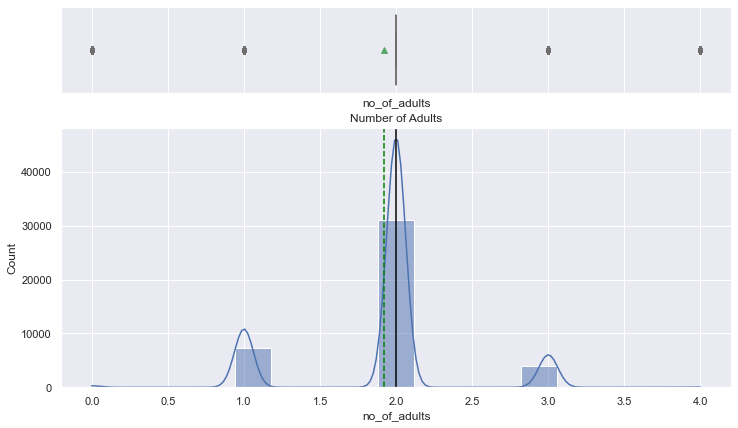

<IPython.core.display.Javascript object>

In [17]:
# plot histogram and boxplot of number of adults
histogram_boxplot(df, "no_of_adults")
plt.title("Number of Adults")
plt.show()

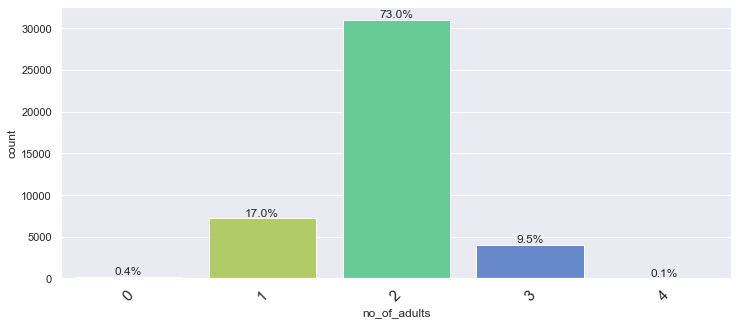

<IPython.core.display.Javascript object>

In [18]:
# plot labeled barplot of number of adults, as this is discrete
labeled_barplot(df, "no_of_adults", perc=True)
plt.show()

* The majority of the bookings are for 2 adults, followed by 1, and then 3
* Curiously, there are some bookings for 0 adults, and there are more of these bookings than for 4 adults

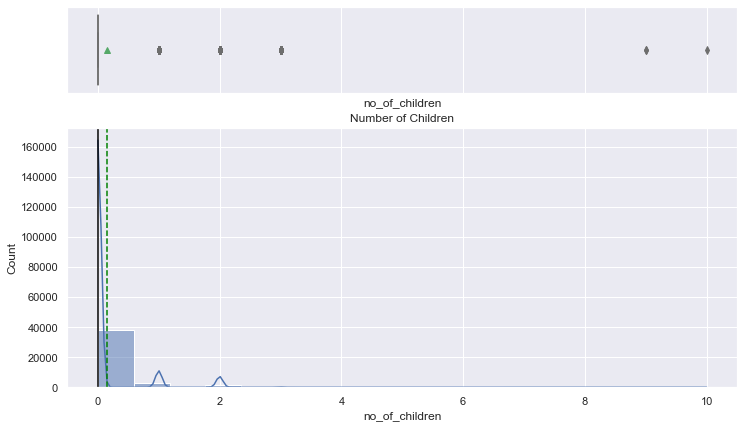

<IPython.core.display.Javascript object>

In [19]:
# plot histogram and boxplot of number of children
histogram_boxplot(df, "no_of_children")
plt.title("Number of Children")
plt.show()

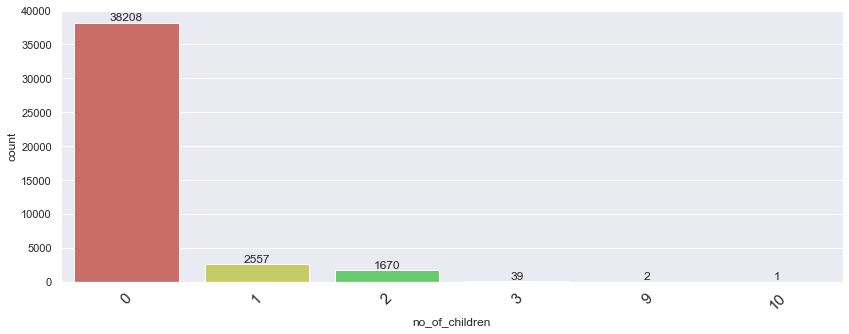

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [20]:
# plot labeled barplot of number of children, as these values are discrete
labeled_barplot(df, "no_of_children")
plt.savefig("child_bar.jpg", bbox_inches="tight")
plt.show()

* The majority of bookings are for only adults--no children
* When there are children noted for the booking, it is usually for 1 child. Next most common is for 2 and then 3. Beyond that, it appears there are a few bookings for larger groups involving children

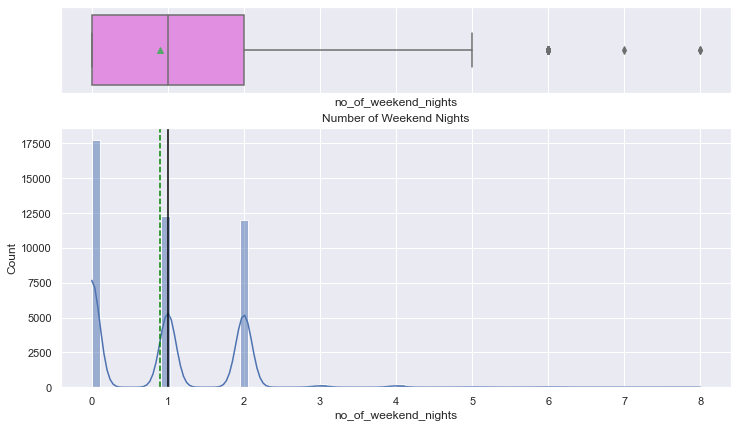

<IPython.core.display.Javascript object>

In [21]:
# plot histogram and boxplot of number of weekend nights
histogram_boxplot(df, "no_of_weekend_nights")
plt.title("Number of Weekend Nights")
plt.show()

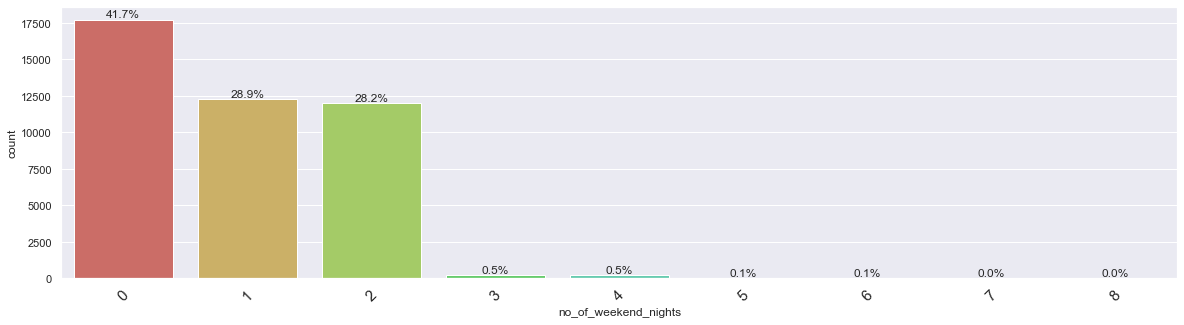

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [22]:
# plot labeled barplot of number of weekend nights, as values are discrete
labeled_barplot(df, "no_of_weekend_nights", perc=True)
plt.savefig("weekend_bar.jpg", bbox_inches="tight")
plt.show()

* 45.1% bookings have no weekend nights
* About 99% of bookings are one week or less

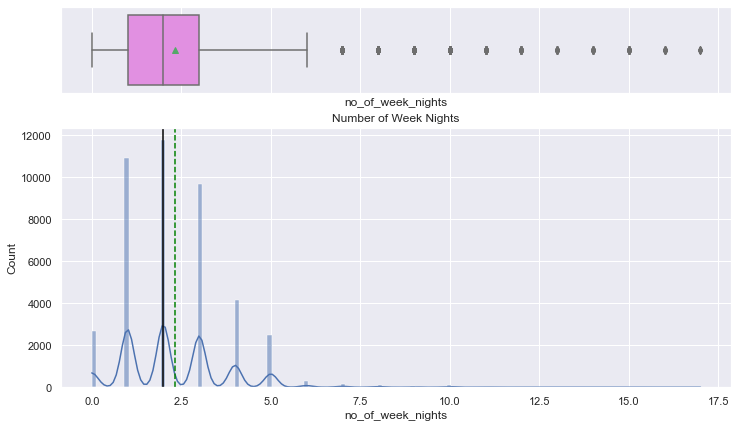

<IPython.core.display.Javascript object>

In [23]:
# plot histogram and boxplot of number of week nights
histogram_boxplot(df, "no_of_week_nights")
plt.title("Number of Week Nights")
plt.show()

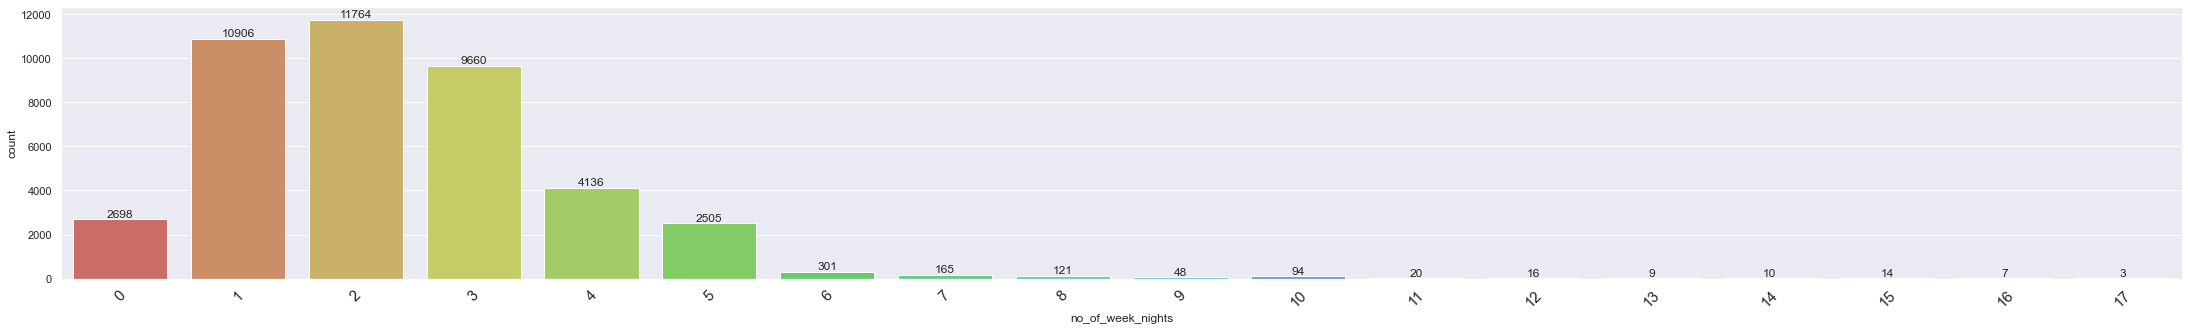

<IPython.core.display.Javascript object>

In [24]:
# plot labeled barplot of number of week nights, as values are discrete
labeled_barplot(df, "no_of_week_nights")
plt.show()

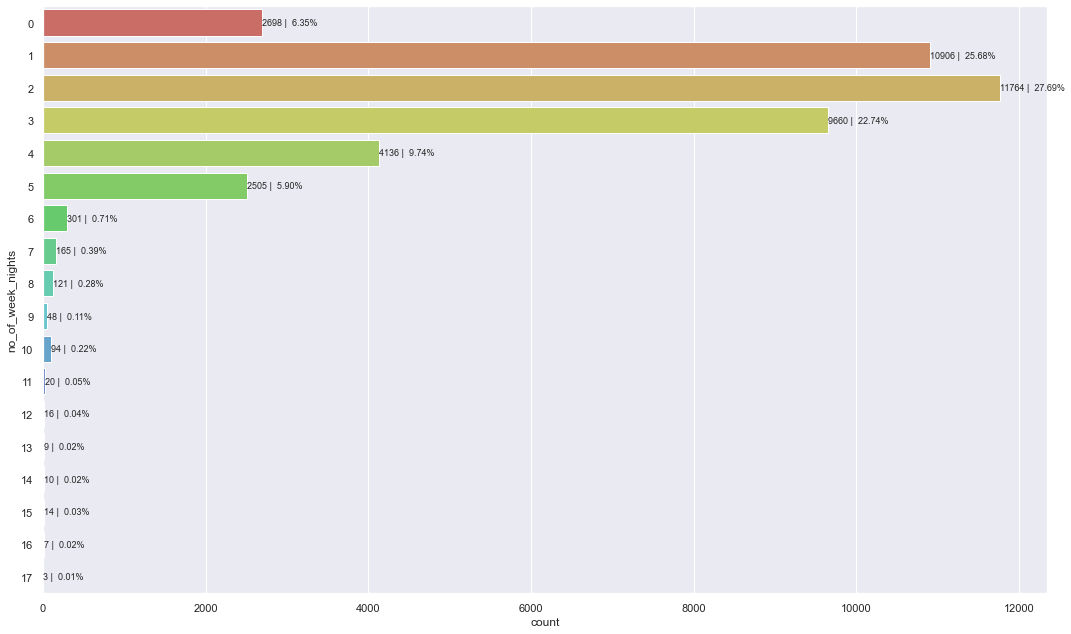

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [25]:
# plot labeled barplot of number of week nights, as values are discrete
horiz_labeled_barplot(df, "no_of_week_nights")
plt.savefig("weeknights_bar.jpg", bbox_inches="tight")
plt.show()

* The most common bookings involve 2 weeknights and no weekend nights
* It may be that when more than one weekend night is booked, it is from the same weekend
* Very few people stay more than half a week

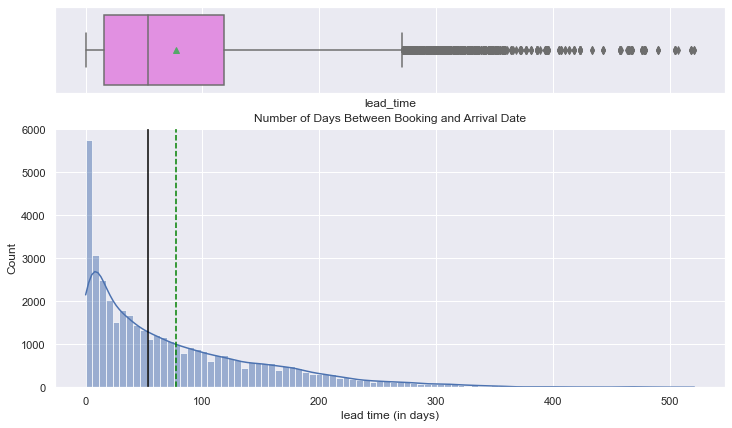

<IPython.core.display.Javascript object>

In [26]:
# plot histogram and boxplot of lead time
histogram_boxplot(df, "lead_time")
plt.title("Number of Days Between Booking and Arrival Date")
plt.xlabel("lead time (in days)")
plt.savefig("lead_time_hist_box.jpg", bbox_inches="tight")
plt.show()

* Lead time is heavily skewed in the positive direction.
* More than half book within 2-3 months of arrival, as they may not know their plans far out in advance
* Some people book more than a year ahead of arrival

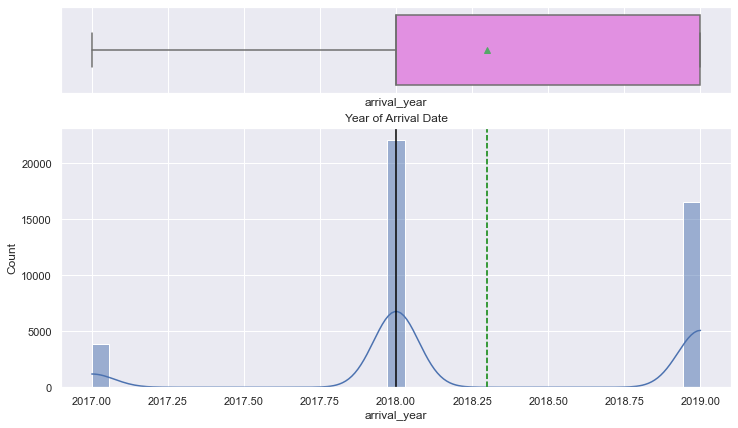

<IPython.core.display.Javascript object>

In [27]:
# plot histogram and boxplot of arrival year
histogram_boxplot(df, "arrival_year")
plt.title("Year of Arrival Date")
plt.show()

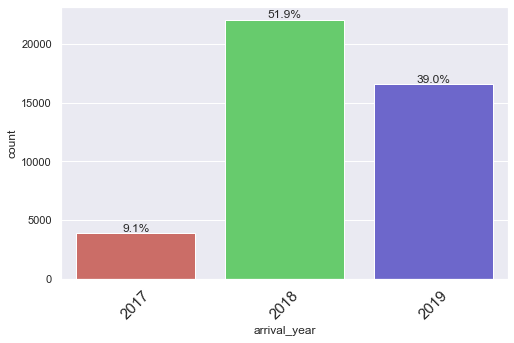

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [28]:
# plot labeled barplot of arrival year
labeled_barplot(df, "arrival_year", perc=True)
plt.savefig("year_bar.jpg", bbox_inches="tight")
plt.show()

* The majority of the data is from bookings for 2018, followed by 2019, and much fewer from 2017

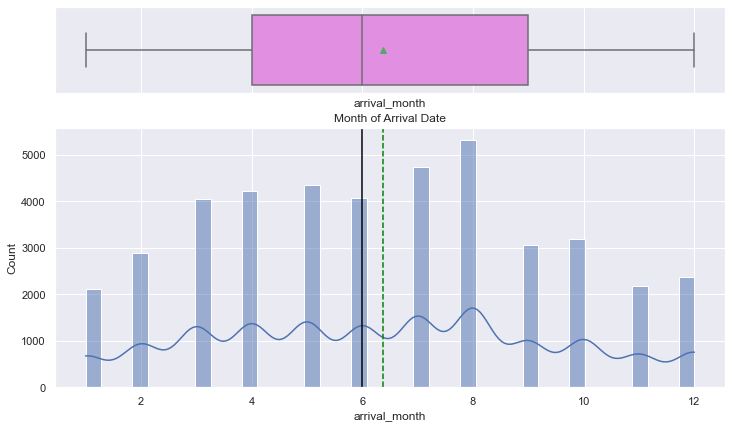

<IPython.core.display.Javascript object>

In [29]:
# plot histogram and boxplot of arrival month
histogram_boxplot(df, "arrival_month")
plt.title("Month of Arrival Date")
plt.show()

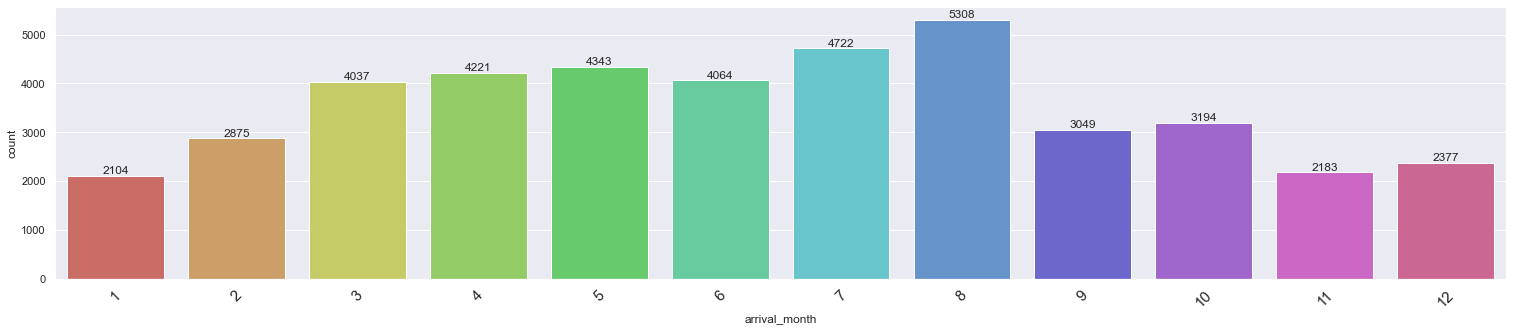

<IPython.core.display.Javascript object>

In [30]:
# plot labeled barplot of arrival month
labeled_barplot(df, "arrival_month")
plt.show()

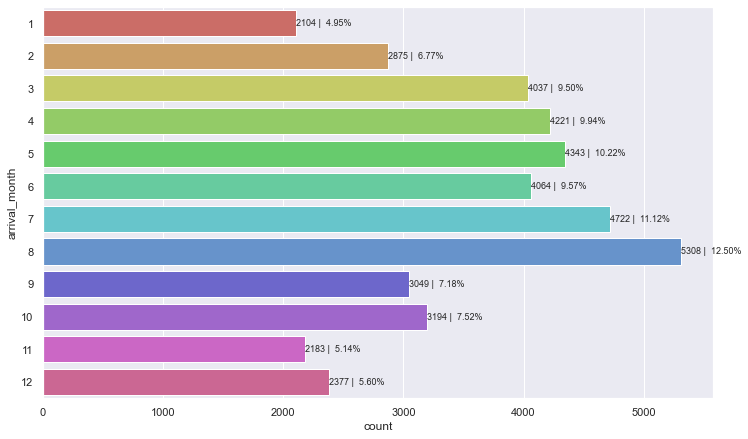

<IPython.core.display.Javascript object>

In [31]:
# plot labeled barplot of arrival month
horiz_labeled_barplot(df, "arrival_month")
plt.show()

* Travel starts to pick up in the spring and is most popular during the summer months
* Travel is less popular during the late fall/early winter
* Busiest months appear to be August, July, May, April, June, and March in descending order, by number of bookings.

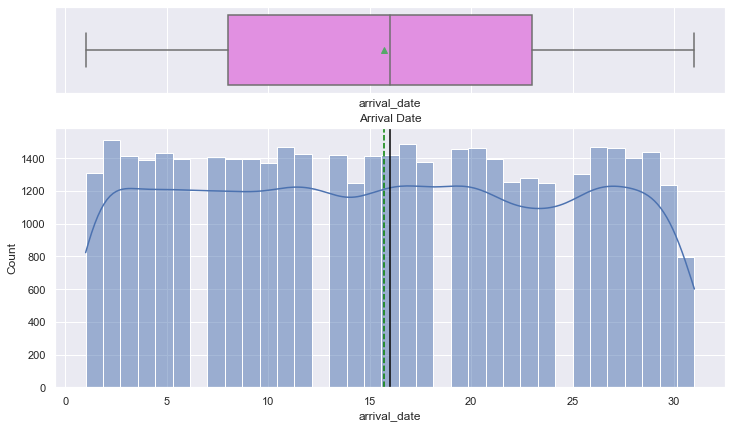

<IPython.core.display.Javascript object>

In [32]:
# plot histogram and boxplot of arrival date
histogram_boxplot(df, "arrival_date")
plt.title("Arrival Date")
plt.savefig("date_hist_box.jpg", bbox_inches="tight")
plt.show()

* Arrival date is about uniformly distributed. Of course there are fewer bookings on the 31st as there are only about half the number of months with 31 days

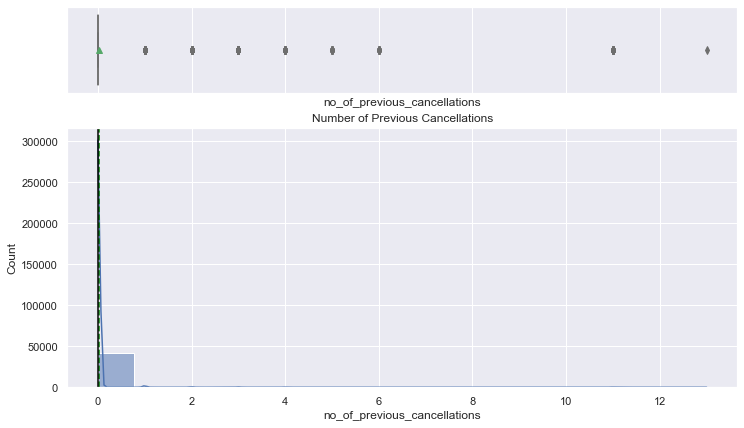

<IPython.core.display.Javascript object>

In [33]:
# plot histogram and boxplot of number of previous cancellations
histogram_boxplot(df, "no_of_previous_cancellations")
plt.title("Number of Previous Cancellations")
plt.show()

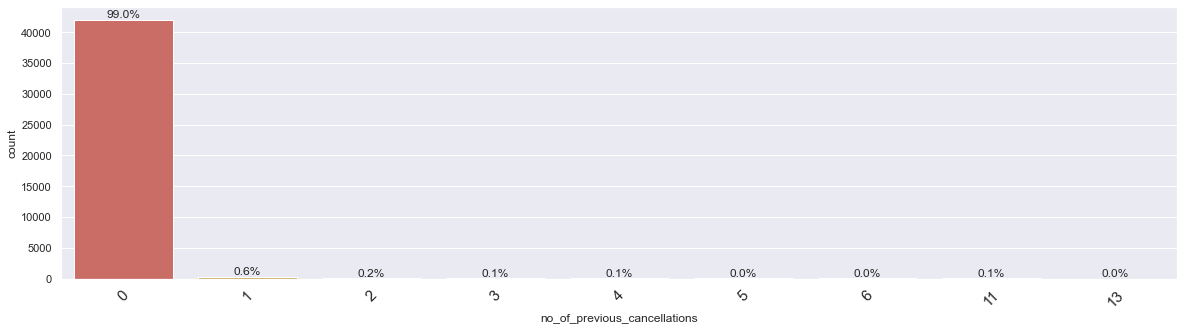

<IPython.core.display.Javascript object>

In [34]:
# plot barplot of number of previous cancellations
labeled_barplot(df, "no_of_previous_cancellations", perc=True)
plt.show()

* It is fairly rare for a booking with someone with a previous cancellation, but there are some with as many as 13 previous cancellations

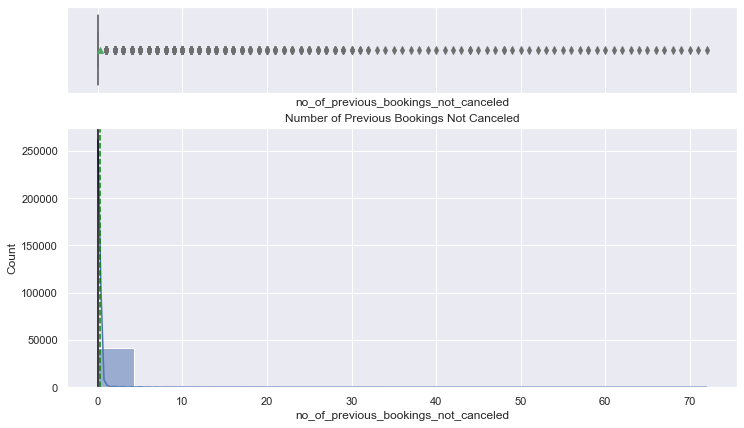

<IPython.core.display.Javascript object>

In [35]:
# plot histogram and boxplot of number of previous bookings not canceled
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")
plt.title("Number of Previous Bookings Not Canceled")
plt.savefig("prev_book_hist_box.jpg", bbox_inches="tight")
plt.show()

* Most of the bookings were not from repeat guests, but there are some with at least 70 previous bookings not cancelled

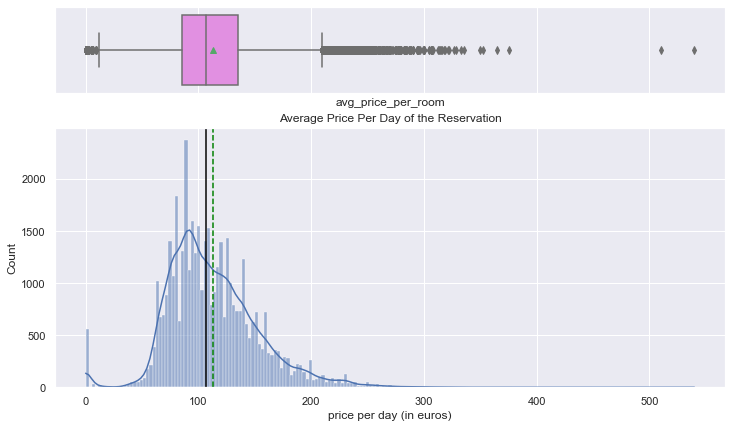

<IPython.core.display.Javascript object>

In [36]:
# plot histogram and boxplot of average price per day of the reservation
histogram_boxplot(df, "avg_price_per_room")
plt.title("Average Price Per Day of the Reservation")
plt.xlabel("price per day (in euros)")
plt.savefig("avg_price_hist_box.jpg", bbox_inches="tight")
plt.show()

* There are many outliers for average price per room, in both directions
* There are a notable number of free rooms
* Some rooms are 5 times the price of the median/mean

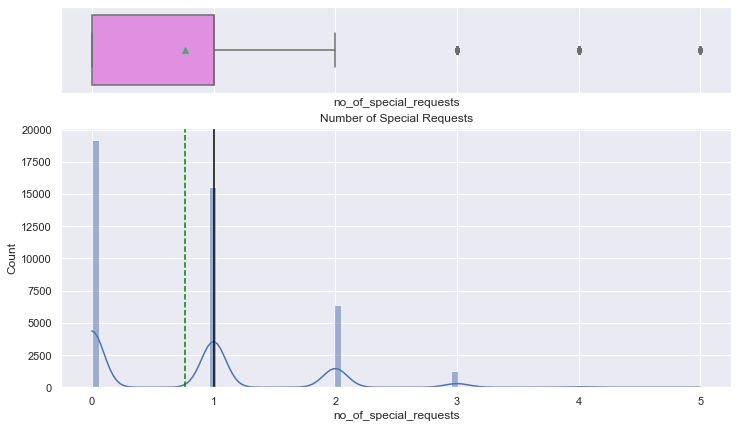

<IPython.core.display.Javascript object>

In [37]:
# plot histogram and boxplot of number of special requests
histogram_boxplot(df, "no_of_special_requests")
plt.title("Number of Special Requests")
plt.show()

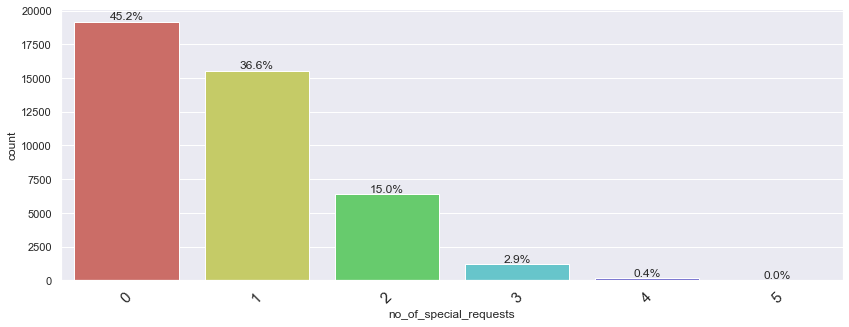

<IPython.core.display.Javascript object>

In [38]:
# plot barplot of number of special requests
labeled_barplot(df, "no_of_special_requests", perc=True)
plt.show()

* Most bookings have zero to one special request

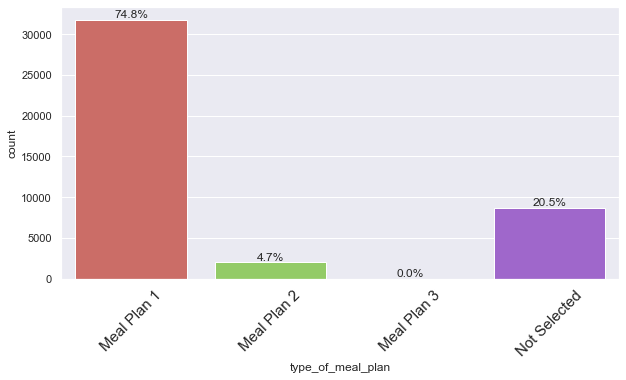

<IPython.core.display.Javascript object>

In [39]:
# plot barplot of type of meal plan
labeled_barplot(df, "type_of_meal_plan", perc=True)
plt.show()

* Meal Plan 1 is the most commonly selected
* No selection is next most common

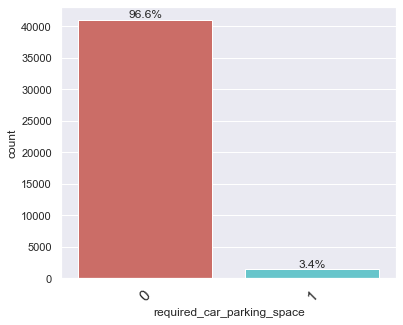

<IPython.core.display.Javascript object>

In [40]:
# plot barplot of car parking space required
labeled_barplot(df, "required_car_parking_space", perc=True)
plt.show()

* Few people need a parking space

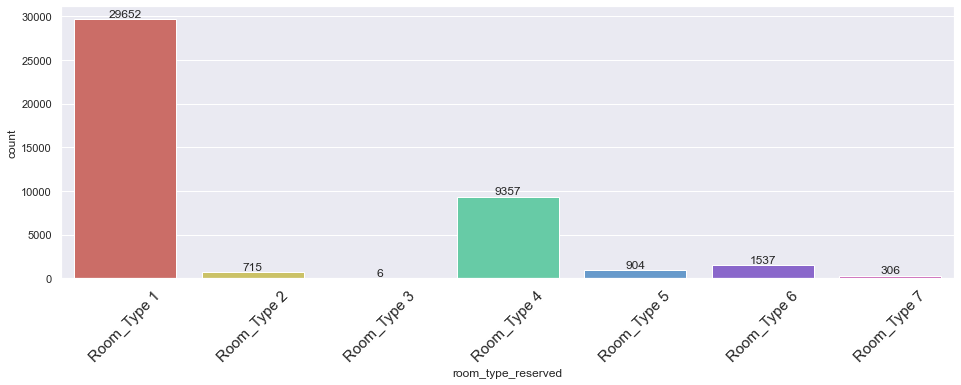

<IPython.core.display.Javascript object>

In [41]:
# plot barplot of room type reserved
labeled_barplot(df, "room_type_reserved")
plt.show()

* Room Type 1 is most common, followed by Type 4
* Room type 3 is rarely ever selected

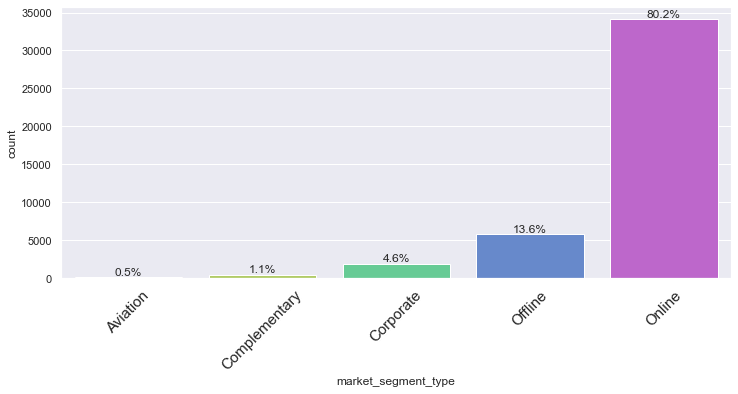

<IPython.core.display.Javascript object>

In [42]:
# plot barplot of market segment designation
labeled_barplot(df, "market_segment_type", perc=True)
plt.show()

* Most bookings are online market
* About a quarter are offline market

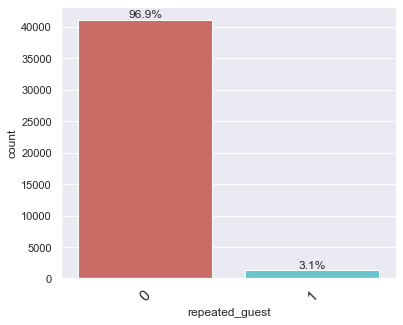

<IPython.core.display.Javascript object>

In [43]:
# plot barplot of repeated guest
labeled_barplot(df, "repeated_guest", perc=True)
plt.show()

* 2.5% bookings are from repeat guests

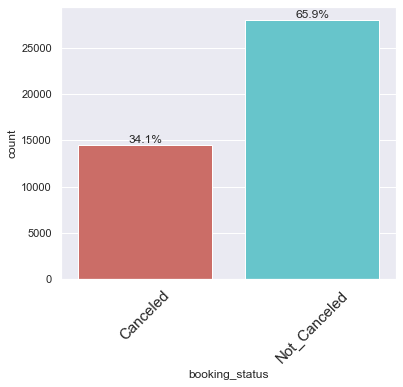

<IPython.core.display.Javascript object>

In [44]:
# plot barplot of booking status
labeled_barplot(df, "booking_status", perc=True)
plt.show()

* More than a third of the bookings are cancelled, which is a large proportion

### Bivariate Analysis

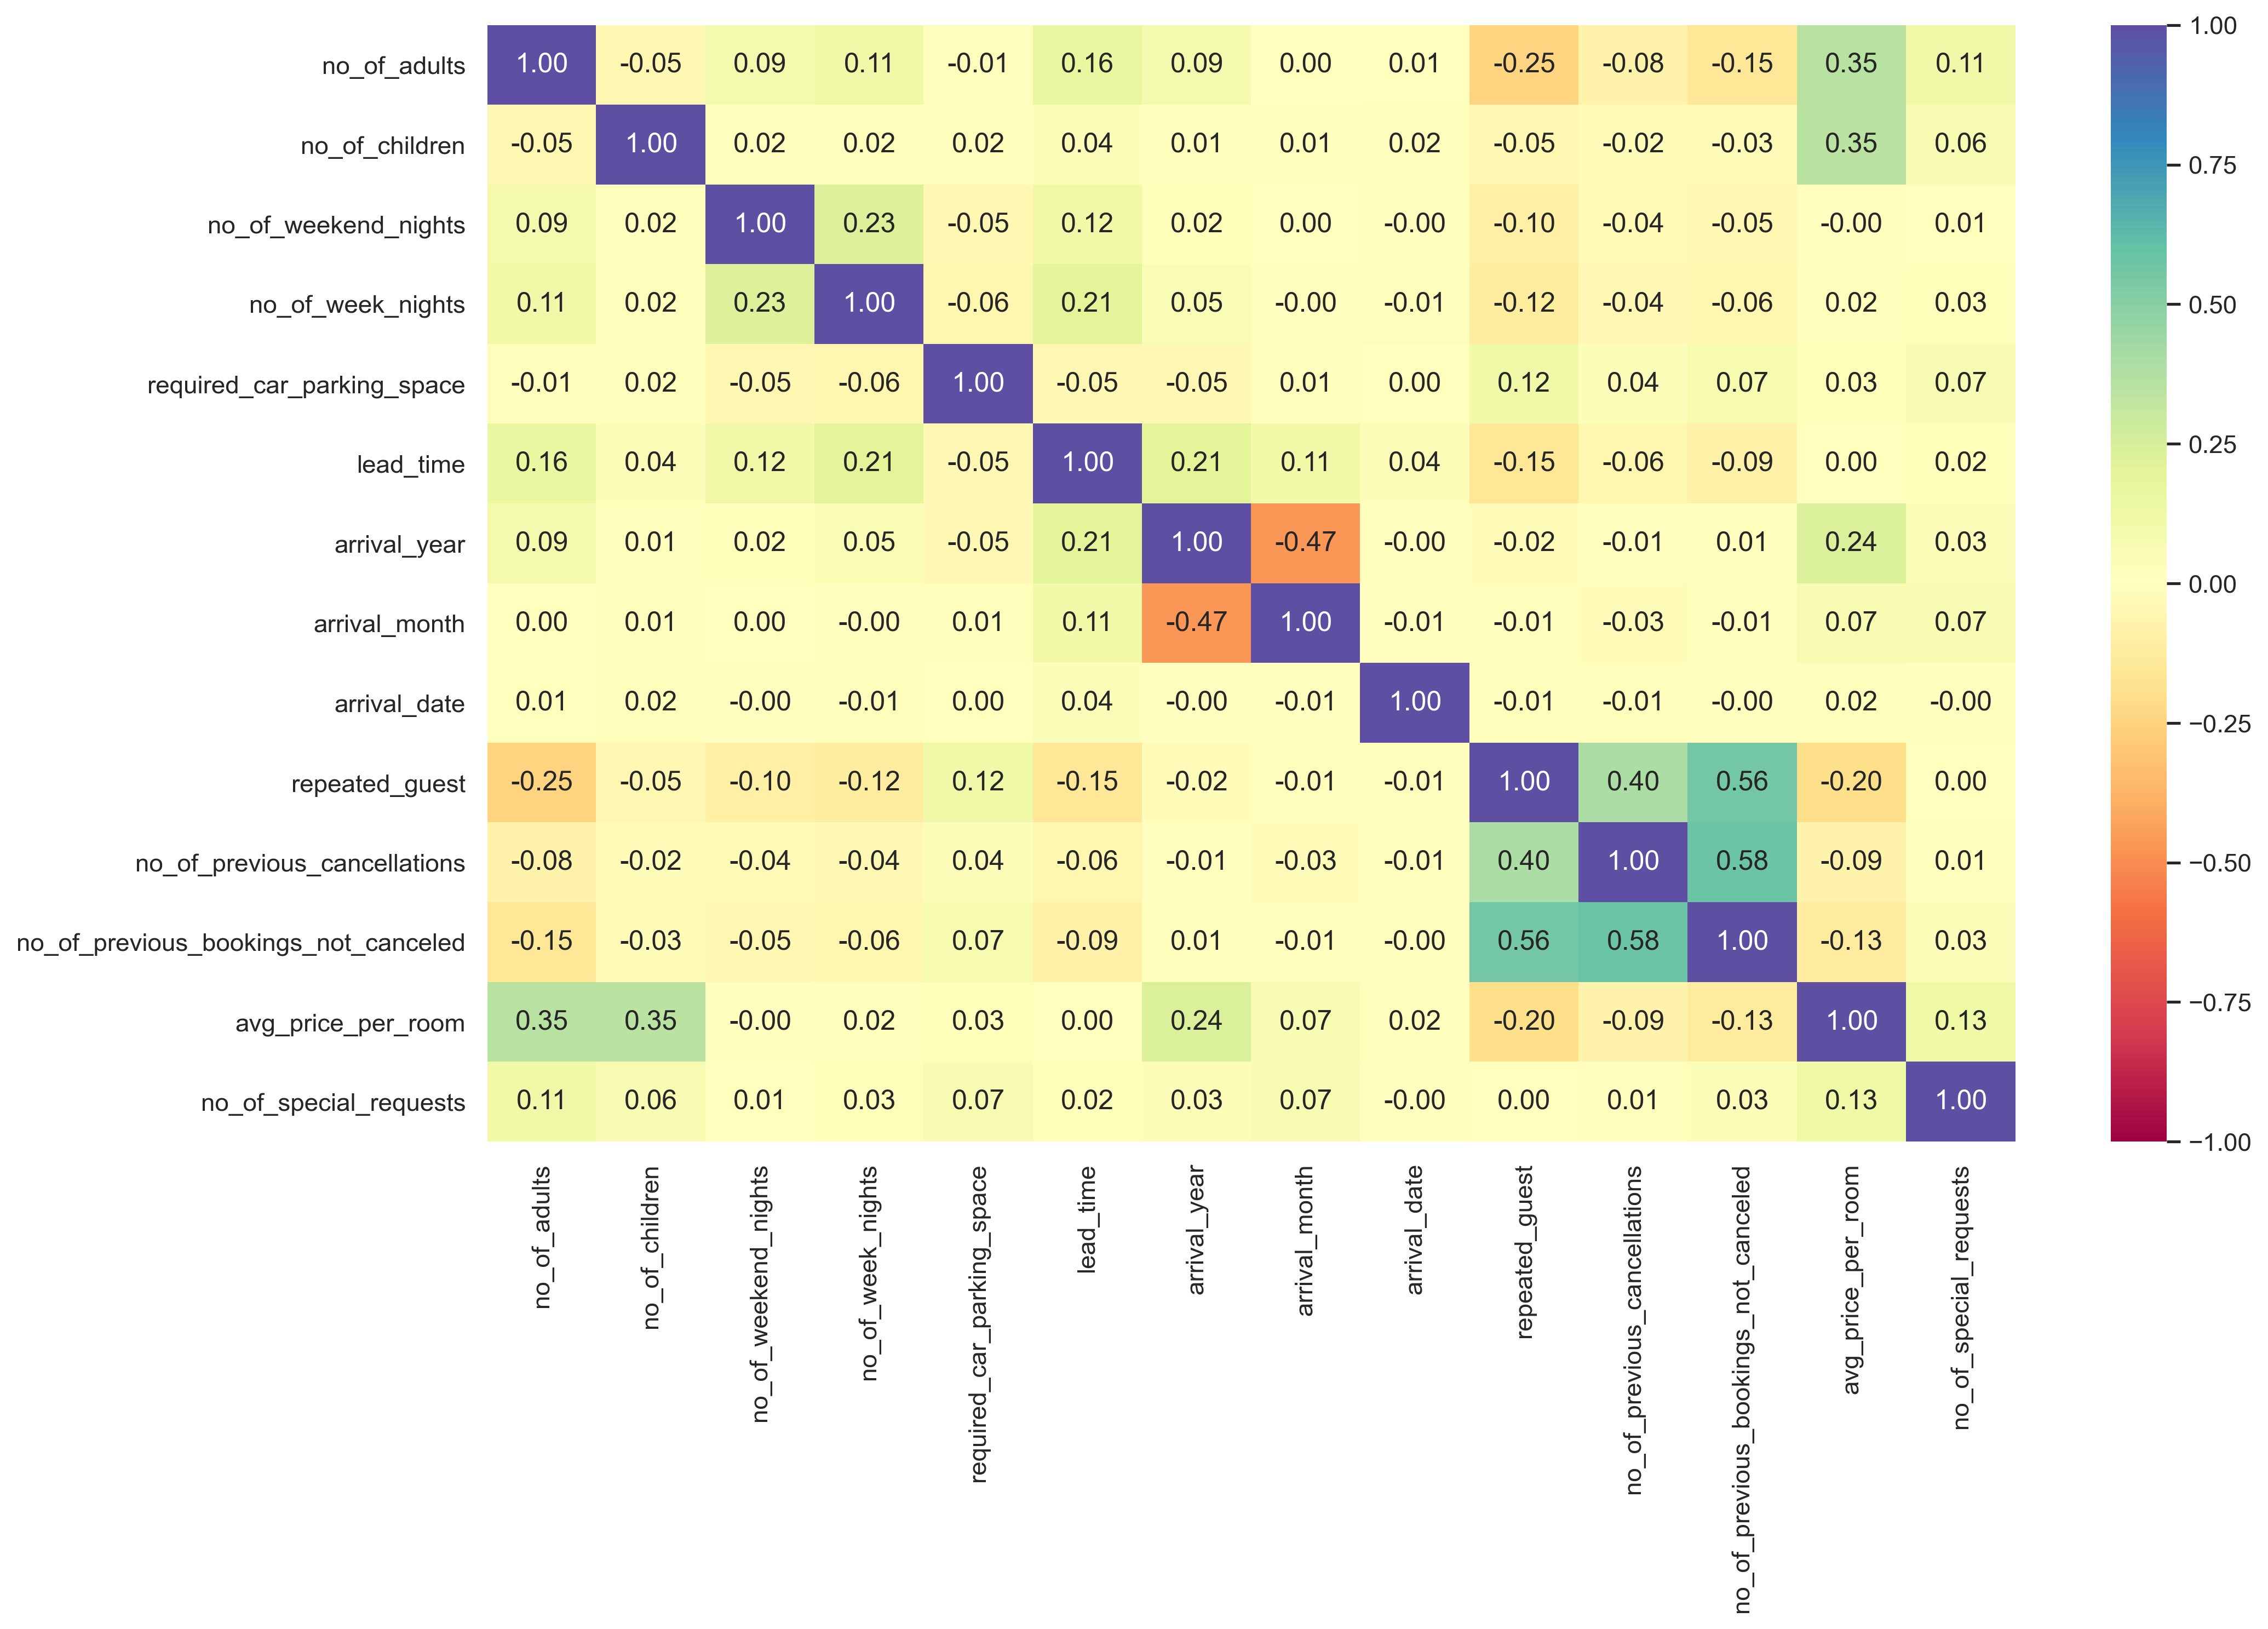

<IPython.core.display.Javascript object>

In [45]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 9), dpi=300)
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.savefig("corr_heatmap.jpg", bbox_inches="tight")
plt.show()

* There are no strongly correlated variables
* There is some positive correlation between `repeated_guest` and `no_of_previous_cancellations` and `no_of_previous_bookings_not_canceled`, which makes sense as only repeat guests might have previous bookings in the first place
* There is positive correlation between `no_of_previous_cancellations` and `no_of_previous_bookings_not_canceled`
* There is a weak positive correlation between `avg_price_per_room` and both `no_of_adults` and `no_of_children`. As more people stay in a room, the room may have to be larger to accommodate more people, and therefore be more expensive.

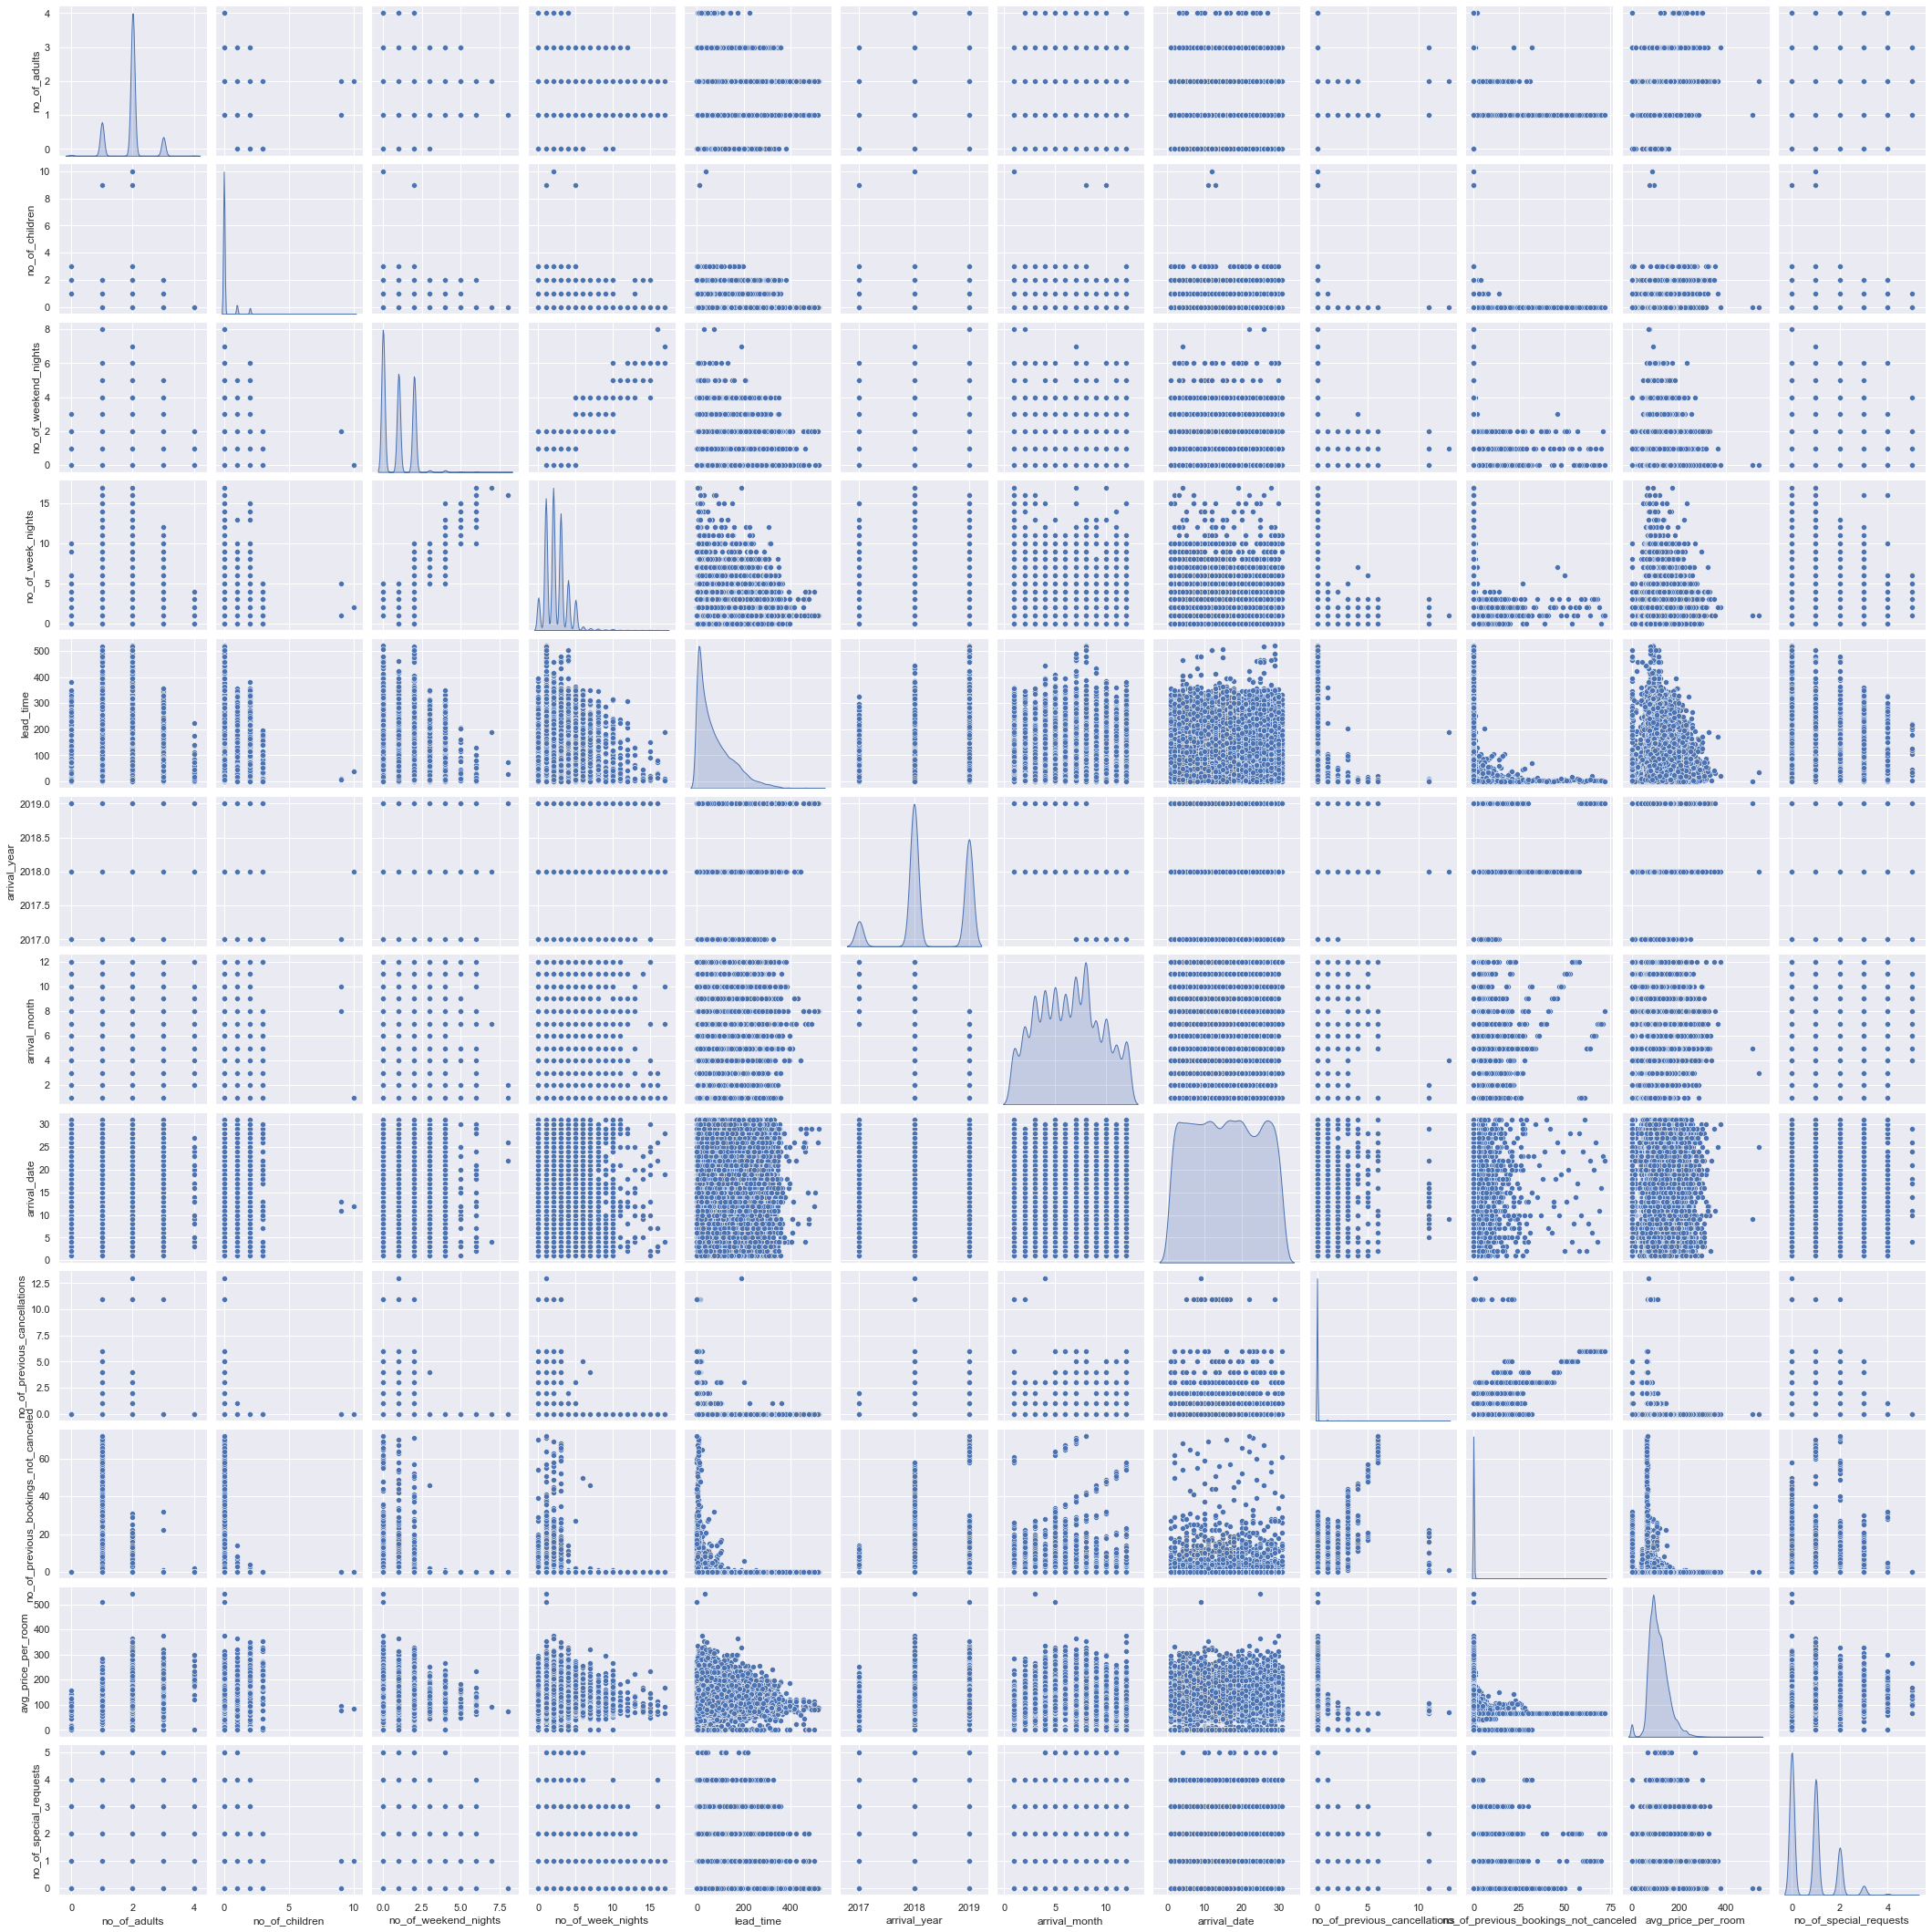

<IPython.core.display.Javascript object>

In [46]:
# look at pairwise relationships of numerical variables
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# remove parking space and repeated guest as they are binary values
cols_to_remove = ["required_car_parking_space", "repeated_guest"]
for col_name in cols_to_remove:
    cols_list.remove(col_name)
sns.pairplot(data=df[cols_list], diag_kind="kde")
plt.show()

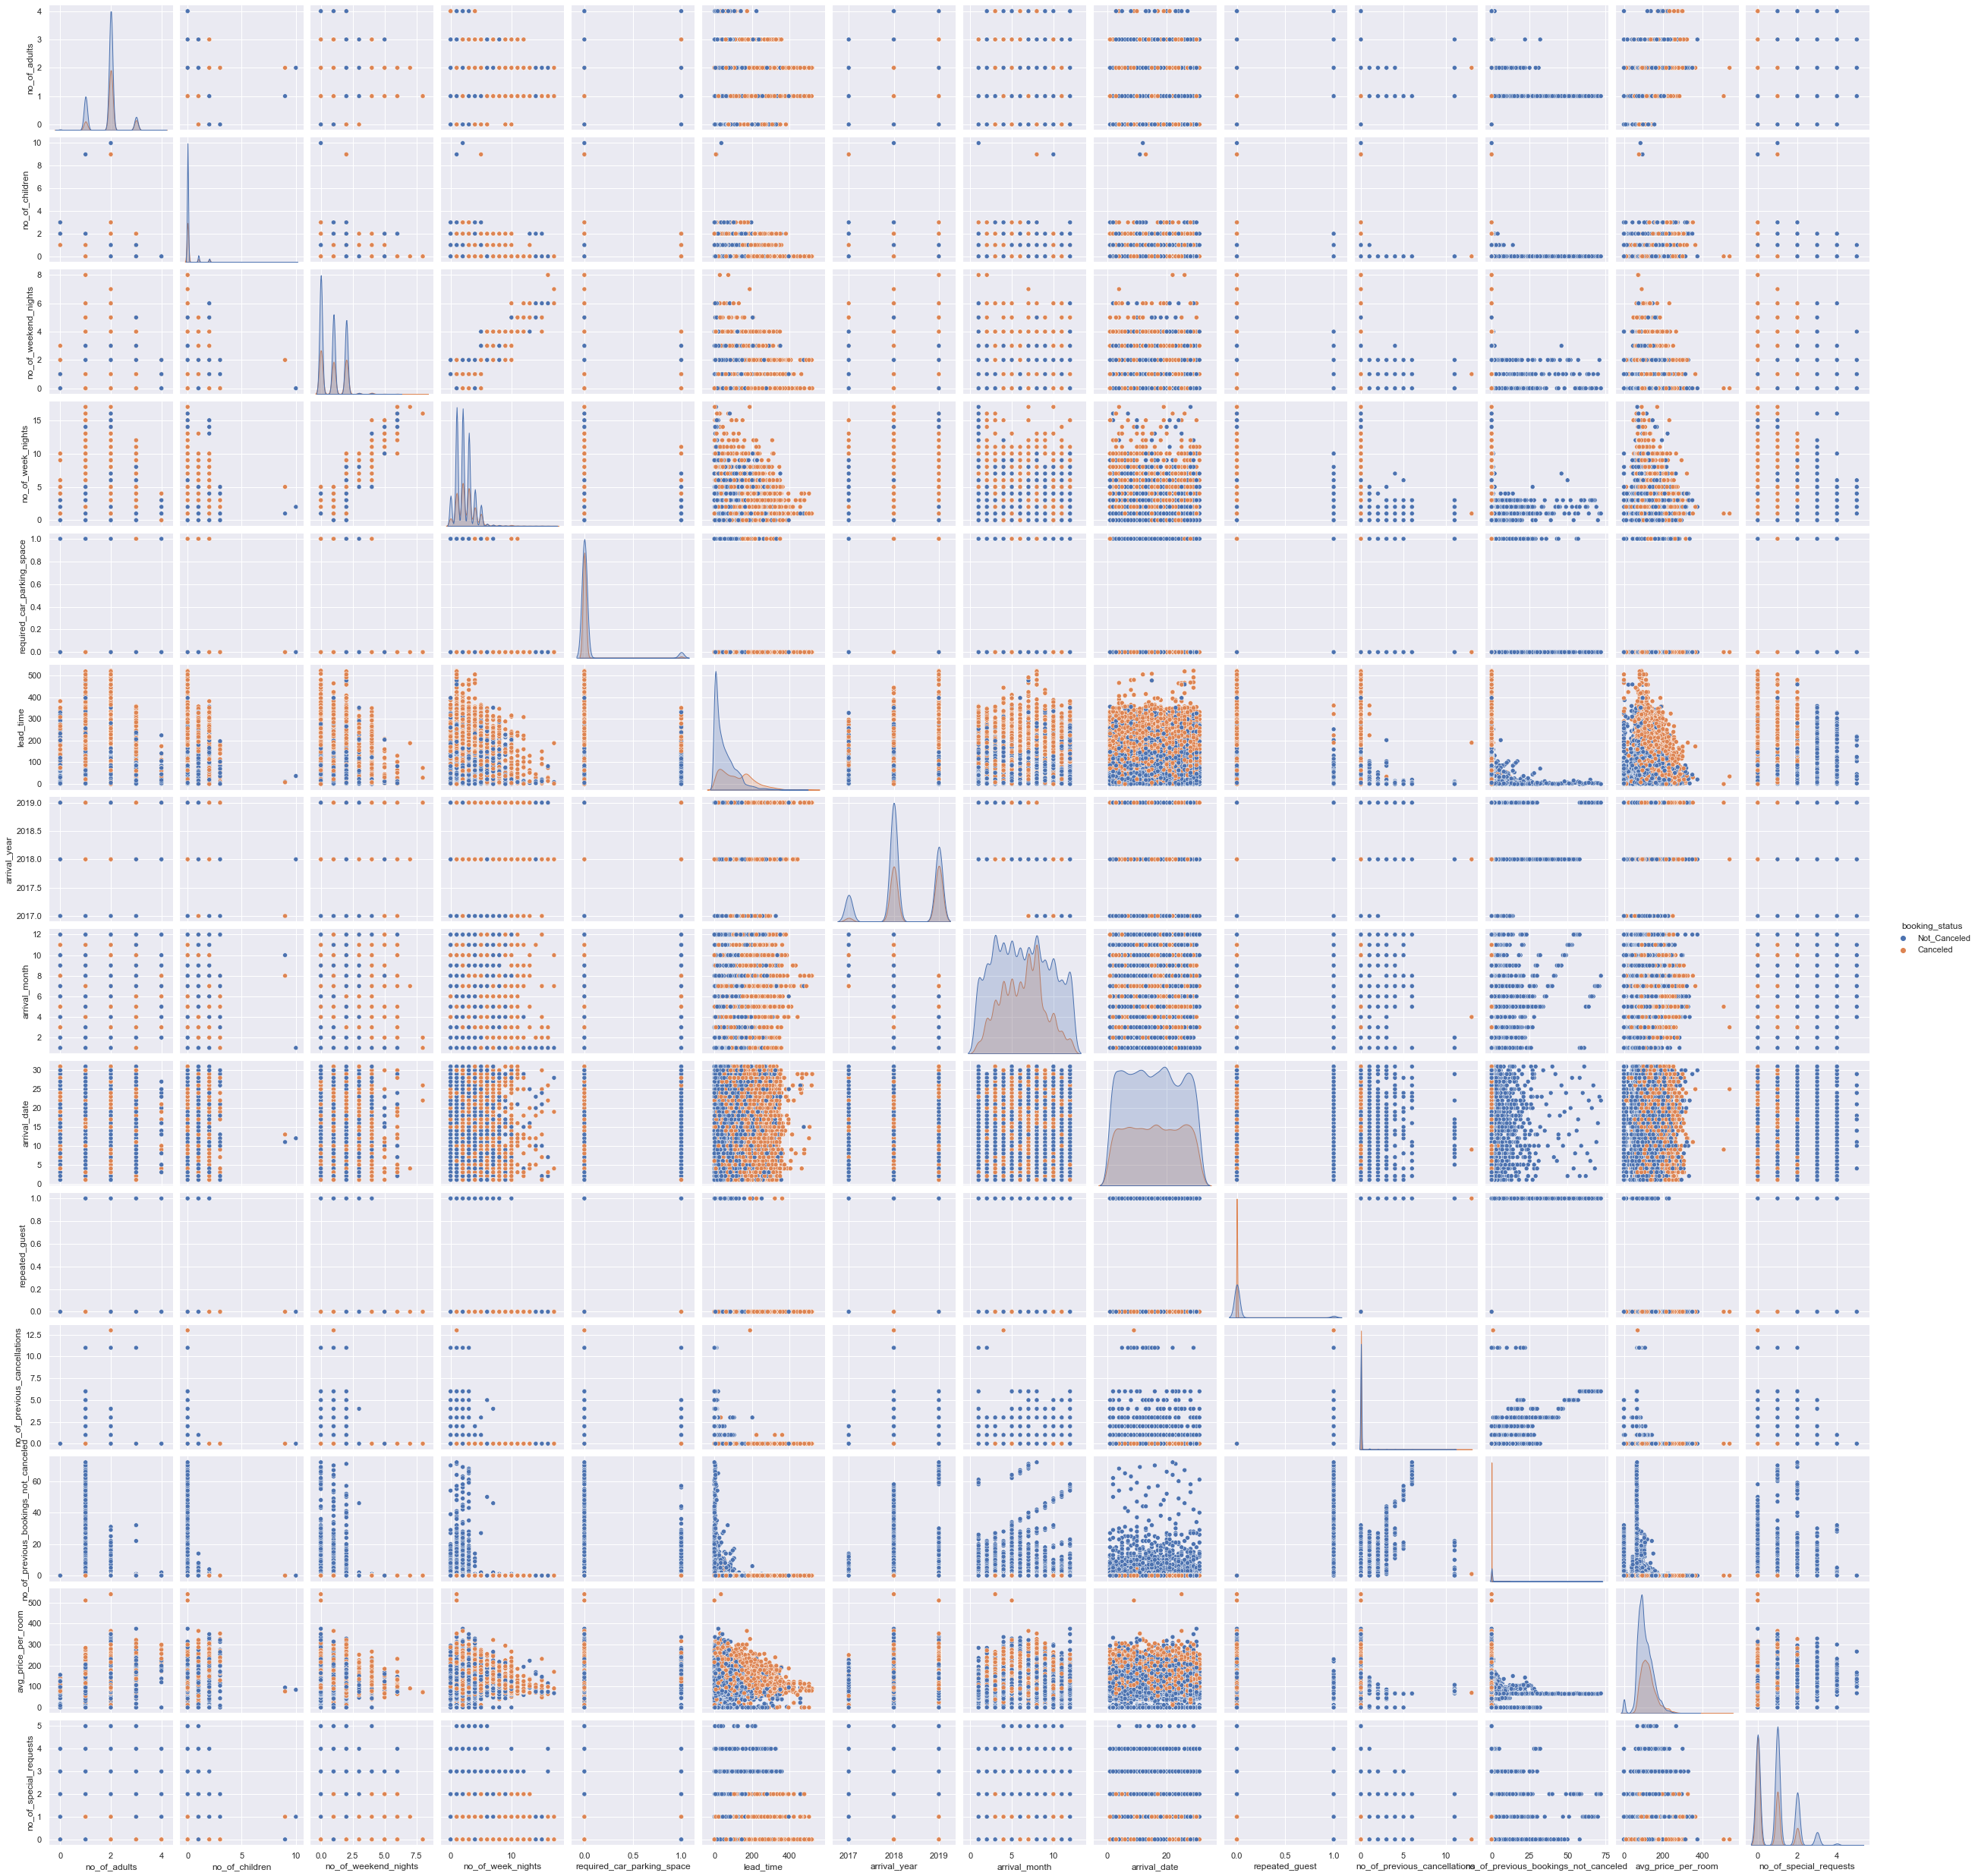

<IPython.core.display.Javascript object>

In [47]:
# look at pairwise relationship between numerical variables with hue of booking status
sns.pairplot(
    df, hue="booking_status",
)
plt.savefig("pairplot.jpg", bbox_inches="tight")
plt.show()

* We see there may be more cancellations with longer lead time, except for bookings with many special requests
* We also see there may be more cancellations with longer stays, except for bookings with many special requests
* Repeat guests tend not to cancel
* There are varying distributions in variables for booking status. We should investigate further

In [48]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

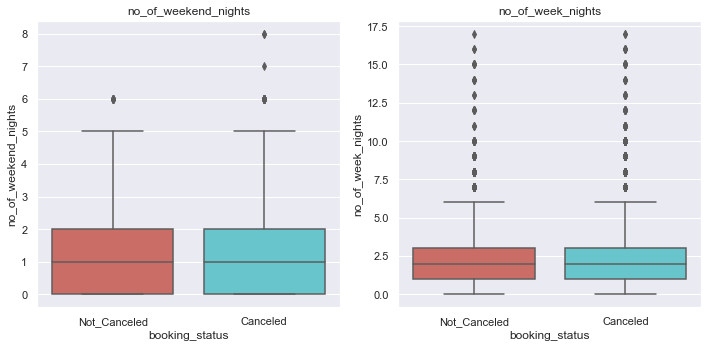

<IPython.core.display.Javascript object>

In [49]:
# plot number of nights (weekend/weeknights) vs booking status
cols = data[["no_of_weekend_nights", "no_of_week_nights"]].columns.tolist()
plt.figure(figsize=(10, 5))

for i, variable in enumerate(cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data["booking_status"], data[variable], palette="hls")
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Number of nights alone does not indicate cancellation

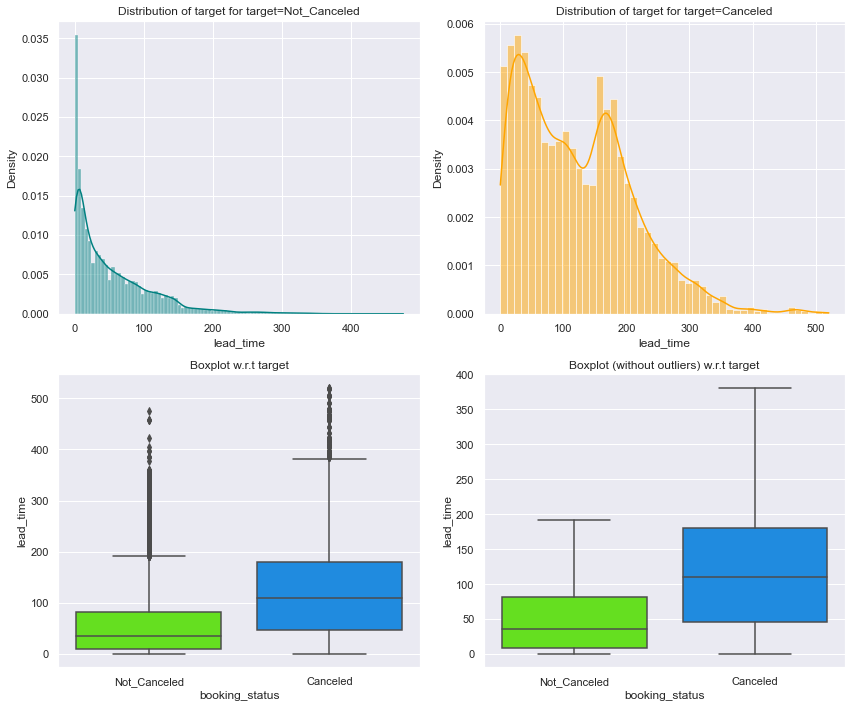

<IPython.core.display.Javascript object>

In [50]:
# plot dist of lead time w.r.t. booking status with/without outliers
distribution_plot_wrt_target(df, "lead_time", "booking_status")

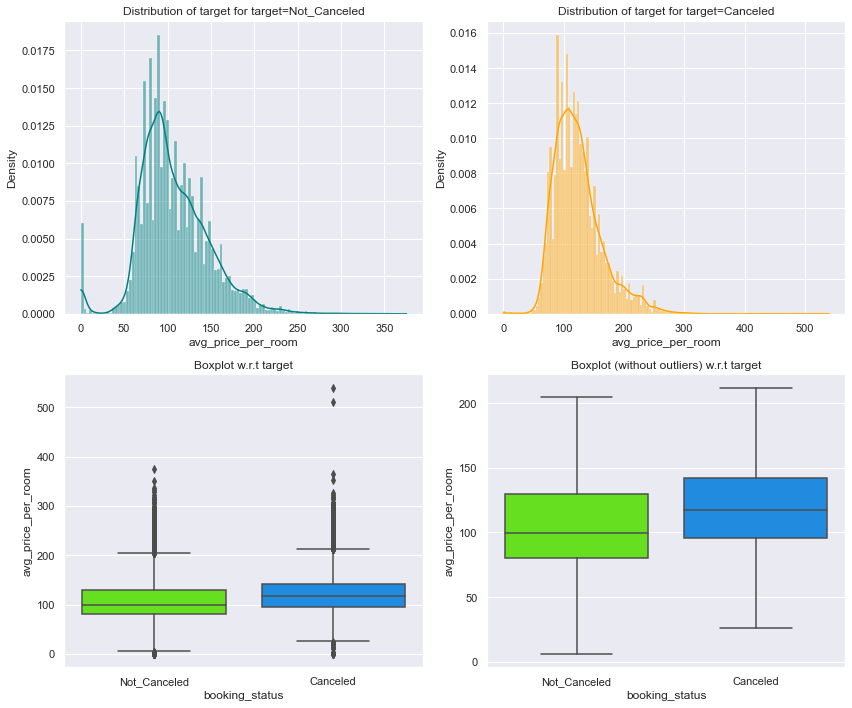

<IPython.core.display.Javascript object>

In [51]:
# plot dist of average price per room w.r.t. booking status, with/without outliers
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

* Cancelled bookings had longer lead time and higher average price per room

In [52]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                14485         27992  42477
2                  10996         20013  31009
3                   1813          2216   4029
1                   1589          5638   7227
0                     76           108    184
4                     11            17     28
------------------------------------------------------------------------------------------------------------------------


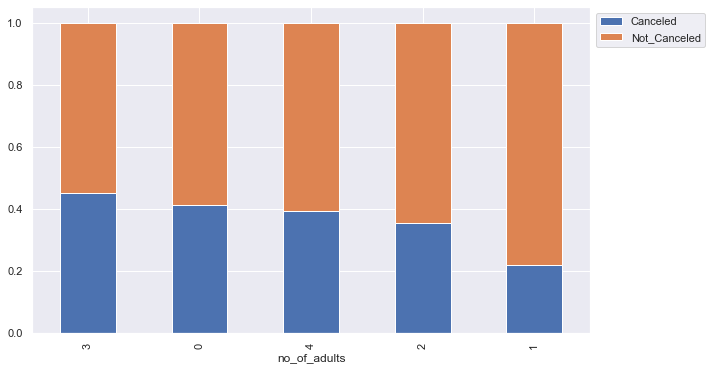

<IPython.core.display.Javascript object>

In [53]:
# plot number of adults vs booking status
stacked_barplot(df, "no_of_adults", "booking_status")

* Bookings with 3 adults and 0 adults have more cancellations than those with 1 or 2

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                14485         27992  42477
0                  12578         25630  38208
1                   1009          1548   2557
2                    883           787   1670
3                     14            25     39
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


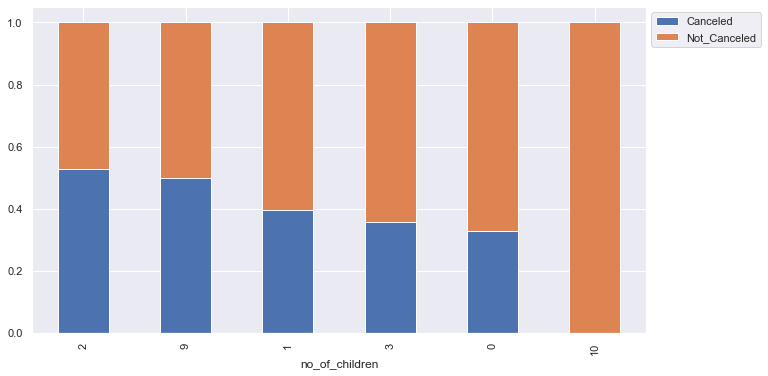

<IPython.core.display.Javascript object>

In [54]:
# plot number of children vs booking status
stacked_barplot(df, "no_of_children", "booking_status")

* Bookings with children have more cancellations than those without. (We will ignore the special case of the 10 children booking as there is only one.)

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      14485         27992  42477
0                         5628         12102  17730
2                         4417          7570  11987
1                         4130          8130  12260
4                          148            68    216
3                          117           103    220
5                           21             9     30
6                           21            10     31
8                            2             0      2
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


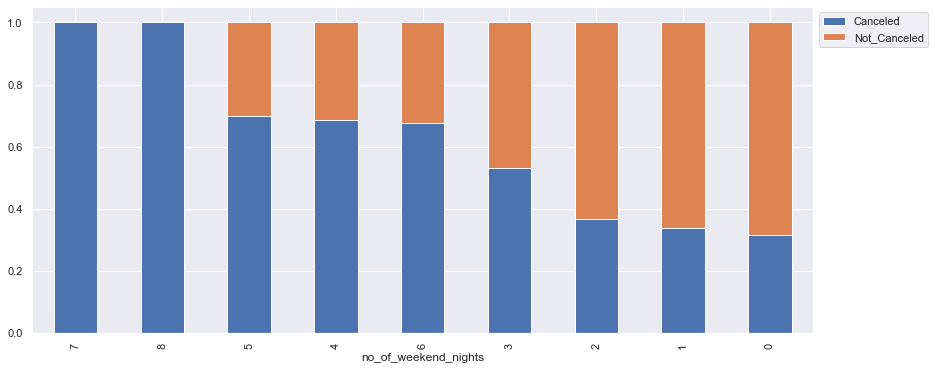

<IPython.core.display.Javascript object>

In [55]:
# plot number of weekend nights vs booking status
stacked_barplot(df, "no_of_weekend_nights", "booking_status")

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   14485         27992  42477
2                      3979          7785  11764
3                      3483          6177   9660
1                      3038          7868  10906
4                      1704          2432   4136
5                      1104          1401   2505
0                       689          2009   2698
6                       161           140    301
7                        90            75    165
10                       79            15     94
8                        74            47    121
9                        29            19     48
11                       17             3     20
12                       11             5     16
15                        8             6     14
13                        7             2      9
14                        5             5     10
16                        5             2      7
17                  

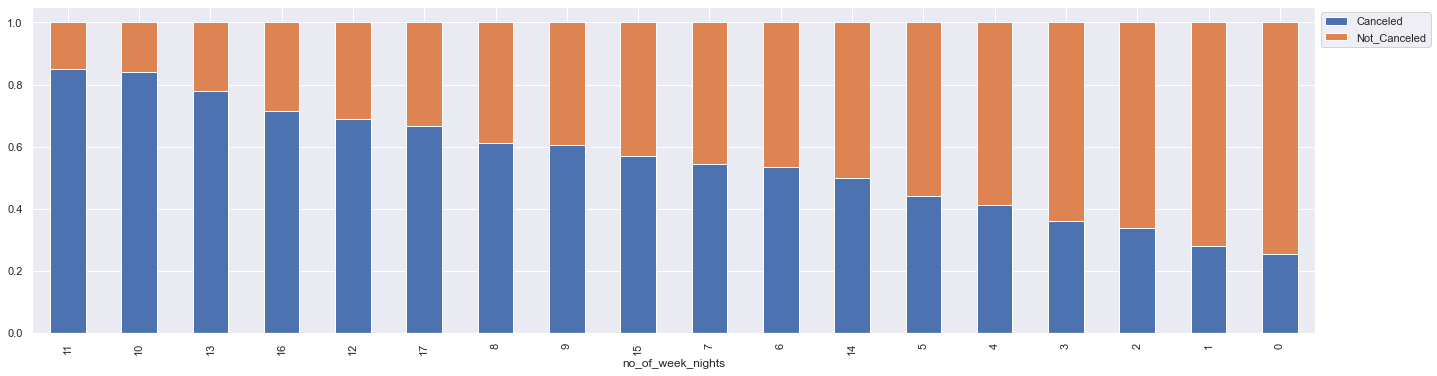

<IPython.core.display.Javascript object>

In [56]:
# plot number of week nights vs booking status
stacked_barplot(df, "no_of_week_nights", "booking_status")

* Bookings with longer stays than just a couple nights have higher proportion of cancellations

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   14485         27992  42477
Meal Plan 1           10509         21283  31792
Not Selected           3118          5576   8694
Meal Plan 2             857          1126   1983
Meal Plan 3               1             7      8
------------------------------------------------------------------------------------------------------------------------


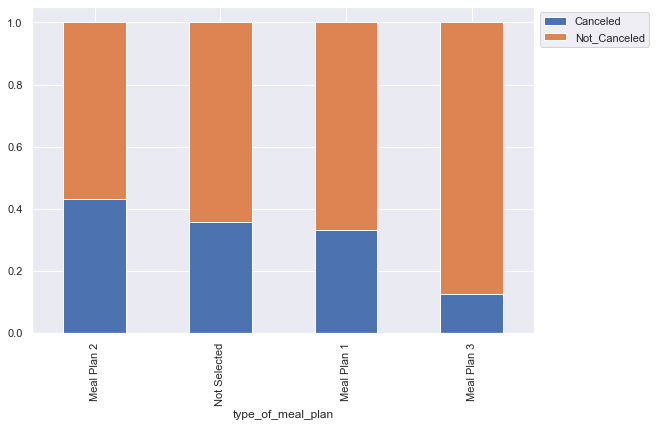

<IPython.core.display.Javascript object>

In [57]:
# plot type of meal plan vs booking status
stacked_barplot(df, "type_of_meal_plan", "booking_status")

* Those who selected meal plan 2 and did not select a meal plan had a higher proportion of cancellations than meal plans 1 and 3

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    14485         27992  42477
Room_Type 1             9223         20429  29652
Room_Type 4             3683          5674   9357
Room_Type 6              826           711   1537
Room_Type 5              367           537    904
Room_Type 2              274           441    715
Room_Type 7              110           196    306
Room_Type 3                2             4      6
------------------------------------------------------------------------------------------------------------------------


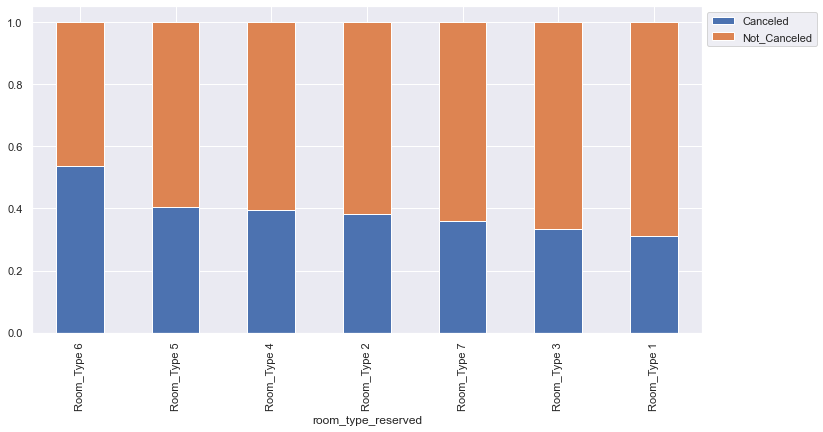

<IPython.core.display.Javascript object>

In [58]:
# plot room type reserved vs booking status
stacked_barplot(df, "room_type_reserved", "booking_status")

* Room types 1, 3, and 7 have the lowest cancellation proportions but types 3 and 7 are not popular. Perhaps 3 and 7 are specialty rooms or expensive?
* After room type 1, types 4, 6, and then 5 have the highest popularity in descending order. But these have the higher cancellation proportions

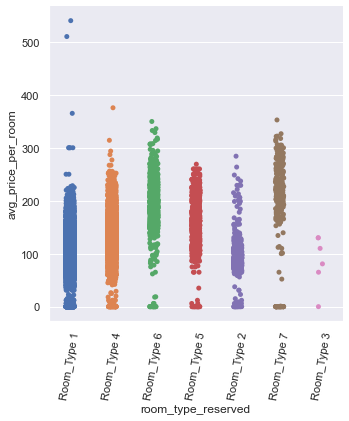

<IPython.core.display.Javascript object>

In [59]:
# plot room type vs average price per room
g = sns.catplot(data=df, x="room_type_reserved", y="avg_price_per_room")
g.set_xticklabels(rotation=80)

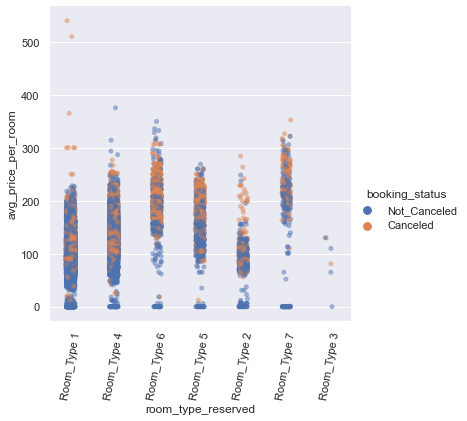

<IPython.core.display.Javascript object>

In [60]:
# plot room type vs average price per room vs status
g = sns.catplot(
    data=df,
    x="room_type_reserved",
    y="avg_price_per_room",
    hue="booking_status",
    alpha=0.5,
)
g.set_xticklabels(rotation=80)
plt.savefig("price_room_status.jpg", bbox_inches="tight")

<AxesSubplot:xlabel='avg_price_per_room', ylabel='room_type_reserved'>

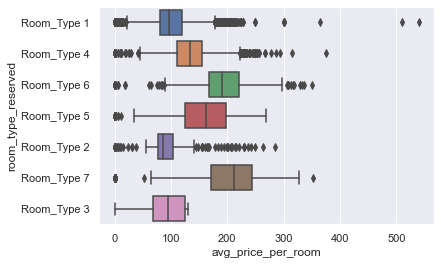

<IPython.core.display.Javascript object>

In [61]:
# plot room type vs average price per room
sns.boxplot(data=df, x="avg_price_per_room", y="room_type_reserved")

<AxesSubplot:xlabel='avg_price_per_room', ylabel='room_type_reserved'>

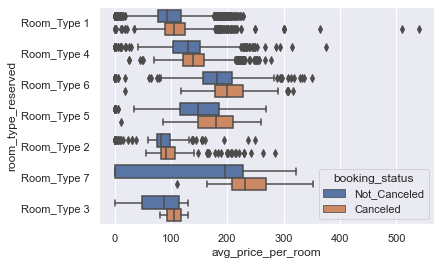

<IPython.core.display.Javascript object>

In [62]:
# plot room type vs average price per room vs booking status
sns.boxplot(
    data=df, x="avg_price_per_room", y="room_type_reserved", hue="booking_status"
)

In [63]:
# median of average price per room grouped by room type
df.groupby(by="room_type_reserved")["avg_price_per_room"].median()

room_type_reserved
Room_Type 1     96.300
Room_Type 2     86.630
Room_Type 3     95.375
Room_Type 4    133.200
Room_Type 5    162.000
Room_Type 6    190.000
Room_Type 7    211.705
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

* Room types 5, 6, and 7 appear more expensive
* Room type 3 is not popular
* More expensive rooms are less booked and more frequently canceled, except for room type 7

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                14485         27992  42477
2019                7045          9507  16552
2018                6965         15089  22054
2017                 475          3396   3871
------------------------------------------------------------------------------------------------------------------------


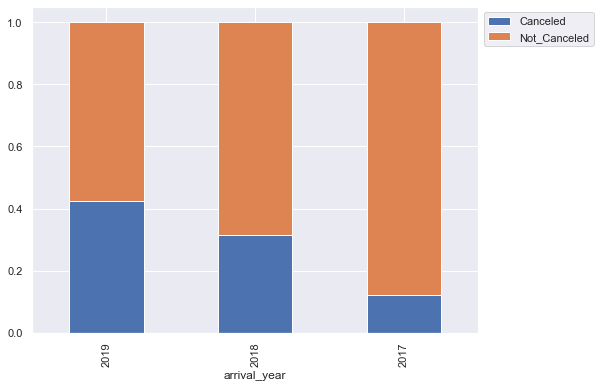

<IPython.core.display.Javascript object>

In [64]:
# plot arrival year vs booking status
stacked_barplot(df, "arrival_year", "booking_status")

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                14485         27992  42477
8                   2475          2833   5308
7                   2240          2482   4722
5                   1674          2669   4343
4                   1627          2594   4221
6                   1583          2481   4064
3                   1195          2842   4037
10                   918          2276   3194
9                    887          2162   3049
2                    796          2079   2875
11                   496          1687   2183
12                   340          2037   2377
1                    254          1850   2104
------------------------------------------------------------------------------------------------------------------------


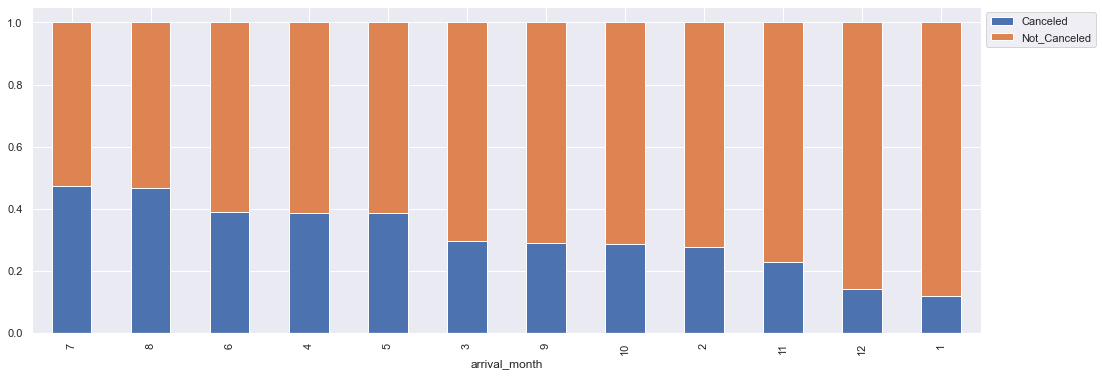

<IPython.core.display.Javascript object>

In [65]:
# plot arrival month vs booking status
stacked_barplot(df, "arrival_month", "booking_status")

In [66]:
# look at value counts of each arrival month, group by booking status
df.groupby(by="booking_status")["arrival_month"].value_counts()

booking_status  arrival_month
Canceled        8                2475
                7                2240
                5                1674
                4                1627
                6                1583
                3                1195
                10                918
                9                 887
                2                 796
                11                496
                12                340
                1                 254
Not_Canceled    3                2842
                8                2833
                5                2669
                4                2594
                7                2482
                6                2481
                10               2276
                9                2162
                2                2079
                12               2037
                1                1850
                11               1687
Name: arrival_month, dtype: int64

<IPython.core.display.Javascript object>

* Although bookings begin to increase beginning in March and reach their height in the summer months, the summer months also contribute the most to cancellations.
* Busiest months by not cancelled bookings: March, August, May, April, July, June in descending order
* 6 busiest months are the same in terms of not cancelled bookings, but in different order.
    * Most busy month only had the 6th highest number of bookings
* March actually has the most bookings that were not cancelled

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     14485         27992  42477
Online                  13481         20605  34086
Offline                   804          4973   5777
Corporate                 167          1772   1939
Aviation                   33           162    195
Complementary               0           480    480
------------------------------------------------------------------------------------------------------------------------


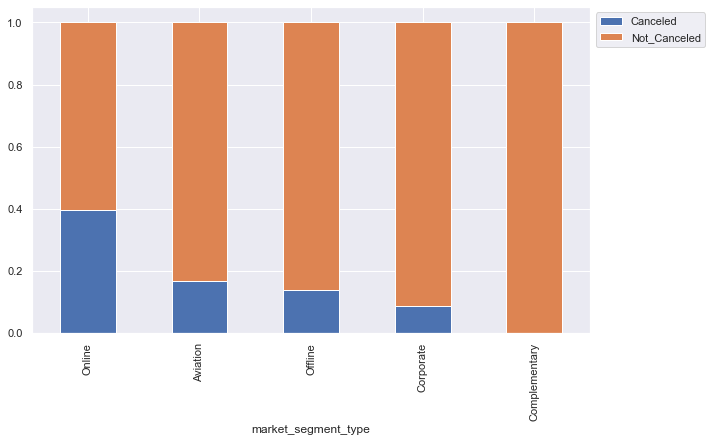

<IPython.core.display.Javascript object>

In [67]:
# plot market segment type vs booking status
stacked_barplot(df, "market_segment_type", "booking_status")

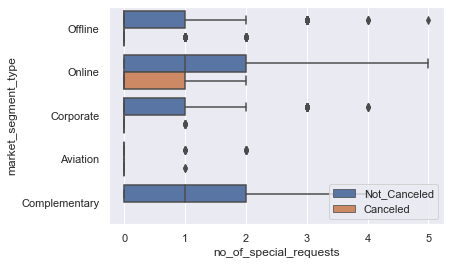

<IPython.core.display.Javascript object>

In [68]:
# plot number of special requests vs market segment type vs booking status
sns.boxplot(
    data=df, x="no_of_special_requests", y="market_segment_type", hue="booking_status"
)
plt.legend(loc="lower right")

<AxesSubplot:xlabel='avg_price_per_room', ylabel='market_segment_type'>

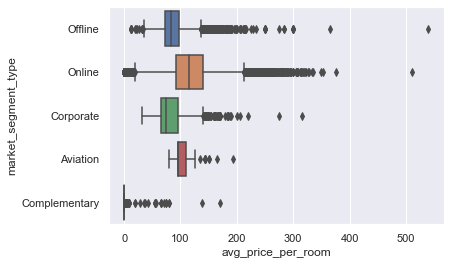

<IPython.core.display.Javascript object>

In [69]:
# plot price vs market segment type
sns.boxplot(data=df, x="avg_price_per_room", y="market_segment_type")

<AxesSubplot:xlabel='lead_time', ylabel='market_segment_type'>

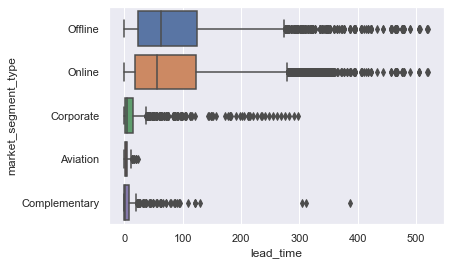

<IPython.core.display.Javascript object>

In [70]:
# plot lead time vs market segment type
sns.boxplot(data=df, x="lead_time", y="market_segment_type")

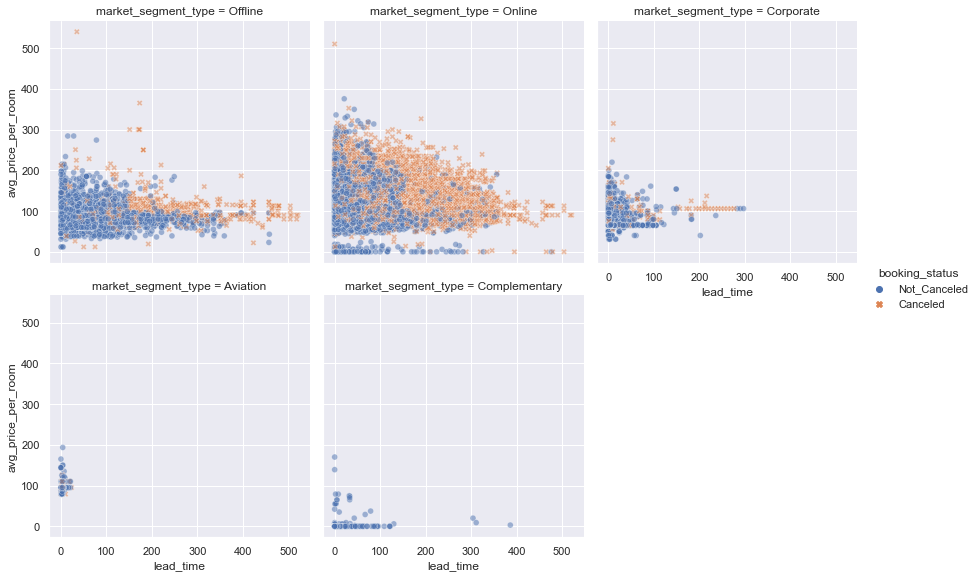

<IPython.core.display.Javascript object>

In [71]:
# plot lead time vs price vs booking status vs market segment type
sns.relplot(
    data=df,
    x="lead_time",
    y="avg_price_per_room",
    col="market_segment_type",
    col_wrap=3,
    height=4,
    hue="booking_status",
    style="booking_status",
    kind="scatter",
    alpha=0.5,
)

In [72]:
# find value counts of booking status for free rooms booked Online
df[(df["market_segment_type"] == "Online") & (df["avg_price_per_room"] == 0)][
    "booking_status"
].value_counts()

Not_Canceled    93
Canceled         8
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

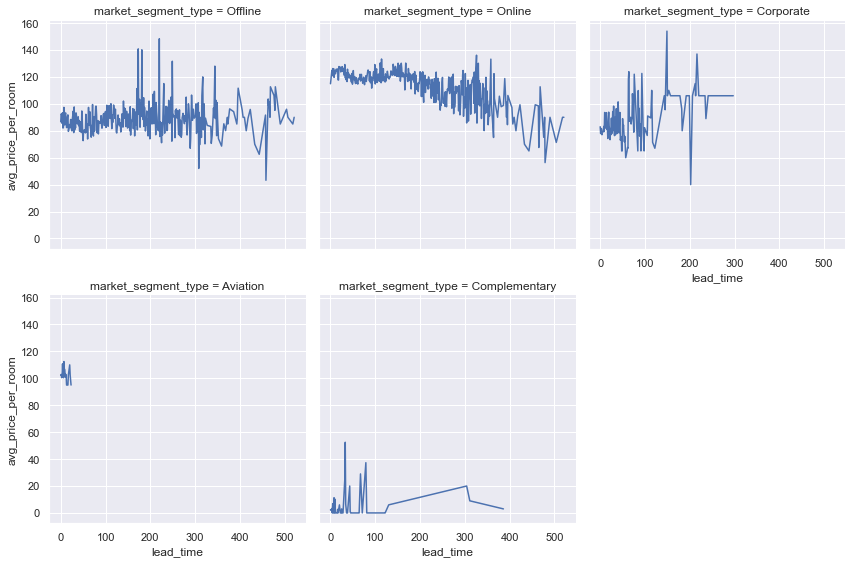

<IPython.core.display.Javascript object>

In [73]:
# plot lead time vs price vs market segment type
g = sns.FacetGrid(df, col="market_segment_type", col_wrap=3, height=4)
g.map(sns.lineplot, "lead_time", "avg_price_per_room", ci=None)

* **Online** market segment: 
    * highest proportion of cancelled bookings
    * number of online bookings largely outweights the others
    * highest proportion of not cancelled bookings (out of all reservations) by far as well
    * most expensive prices per room, even with same lead time, to begin with
    * average prices trend downward with more leadtime as opposed to some other market segment tyes
    * some free rooms from this segment, with a few cancelled
    * more lead time and higher prices have more cancellations
* Aside from complimentary rooms, **Corporate** market segment:
    * on average (median), cheapest
    * the smallest proportion of cancellations
    * prices start to increase with more lead time
* Aside from complimentary rooms, **Offline** market segment:
    * second lowest average price per room
    * second lowest proportion of cancellations
    * prices do not have an upward or downward trend with lead time
    * more lead time and higher prices have more cancellations
* **Aviation** market segment 
    * had the fewest bookings
    * second highest proportion of cancellations
    * the second highest average price per room
    * very little lead time
* None of the complementary bookings were cancelled

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                14485         27992  42477
0                  14475         26695  41170
1                     10          1297   1307
------------------------------------------------------------------------------------------------------------------------


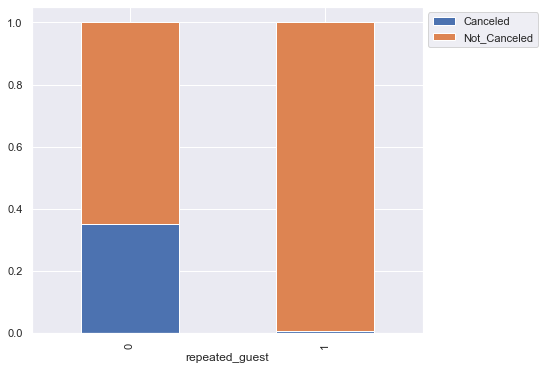

<IPython.core.display.Javascript object>

In [74]:
# plot repeated guests vs booking status
stacked_barplot(df, "repeated_guest", "booking_status")

* Less than 1% of repeated guests cancelled bookings
* A little over one-third of non-repeated guests cancelled bookings

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              14485         27992  42477
0                                14475         27560  42035
1                                    8           239    247
3                                    1            46     47
13                                   1             0      1
2                                    0            66     66
4                                    0            24     24
5                                    0            16     16
6                                    0            16     16
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


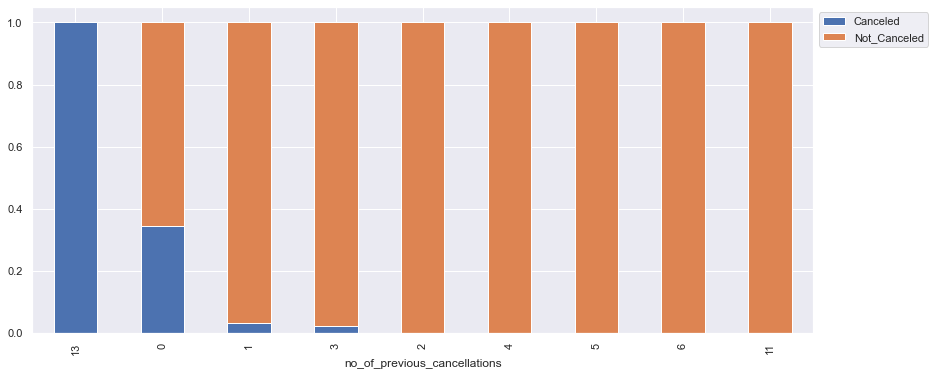

<IPython.core.display.Javascript object>

In [75]:
# plot number of previous cancellations vs booking status
stacked_barplot(df, "no_of_previous_cancellations", "booking_status")

* Generally speaking, most of the cancellations came from guests who had no previous cancellations
* There were some but very few from those with 1 and 3 cancellations, and 1 from someone who had 13 previous cancellations

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        14485         27992  42477
0                           8750         10430  19180
1                           4346         11187  15533
2                           1389          4980   6369
3                              0          1229   1229
4                              0           150    150
5                              0            16     16
------------------------------------------------------------------------------------------------------------------------


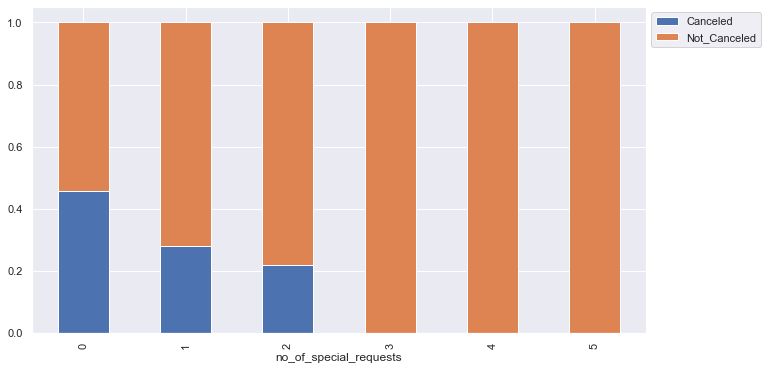

<IPython.core.display.Javascript object>

In [76]:
# plot number of special requests vs booking status
stacked_barplot(df, "no_of_special_requests", "booking_status")

* Bookings with 3 or more special requests were not cancelled.
* The bookings with no special requests contributed the most to cancellations
* As number of special requests increases, proportion of cancellation decreases

## Model evaluation criterion

### Model can make wrong predictions as:
1. Model predicted a cancellation when the guest would not have actually cancelled - False positive. 
    * In the case of double booking, this could create negative views of the hotel by the guest
    * This would require human resources to make alternate arrangements for guests or vouchers for a free stay/other perks in the future
2. Model predicted no cancellation when the guest would actually cancel - False negative
    * Lost revenue when the hotel cannot resell the room
    * Hotel may incur additional costs by increasing commissions or paying for marketing to help sell these rooms
    * Hotel may need to lower prices so the hotel can resell the room, resulting in reducing profit margin

### How to reduce this loss
* Company would want to reduce false positives and false negatives
* `f1_score` should be maximized for better chances at identifying both the classes correctly

In [77]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [78]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Data Preparation

* Room type is not necessarily ordered by price, so we will not impose an order
* Type of meal plan does not necessarily have a clear order so we will not impose an order

In [79]:
# change month from numerical to categorical
import calendar

df["month"] = df["arrival_month"].apply(lambda x: calendar.month_name[x])

<IPython.core.display.Javascript object>

In [80]:
# drop arrival_month
df.drop("arrival_month", axis=1, inplace=True)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_date market_segment_type  repeated_guest  \
0          2017             2             Offline               0   
1          2018             6              Online               0   
2          2018            28              Online               0   
3          2018            20              Online               0   
4          2019            13              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests booking_status     month  
0               65.00                       0   Not_Canceled   October  
1              106.68                       1   Not_Canceled  November  
2               60.00                       0       Canceled  February  
3              100.00                       0       Canceled       May  
4               89.10                       2       Canceled      July

<IPython.core.display.Javascript object>

In [81]:
# change the column name from booking_status to booking_canceled
df1 = df.rename(columns={"booking_status": "booking_canceled"})
df1.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_date market_segment_type  repeated_guest  \
0          2017             2             Offline               0   
1          2018             6              Online               0   
2          2018            28              Online               0   
3          2018            20              Online               0   
4          2019            13              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests booking_canceled     month  
0               65.00                       0     Not_Canceled   October  
1              106.68                       1     Not_Canceled  November  
2               60.00                       0         Canceled  February  
3              100.00                       0         Canceled       May  
4               89.10                       2         Canceled      July

<IPython.core.display.Javascript object>

In [82]:
# create change in structure from strings to binary
replaceStatus = {"booking_canceled": {"Not_Canceled": 0, "Canceled": 1}}

<IPython.core.display.Javascript object>

In [83]:
# apply the replacement
df1 = df1.replace(replaceStatus)
df1.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_date market_segment_type  repeated_guest  \
0          2017             2             Offline               0   
1          2018             6              Online               0   
2          2018            28              Online               0   
3          2018            20              Online               0   
4          2019            13              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  booking_canceled     month  
0               65.00                       0                 0   October  
1              106.68                       1                 0  November  
2               60.00                       0                 1  February  
3              100.00                       0                 1       May  
4               89.10                       2                 1      July

<IPython.core.display.Javascript object>

In [84]:
# split data
# drop arrival_year, as we cannot go back in time--only forward
X = df1.drop(["booking_canceled", "arrival_year"], axis=1)
y = df1["booking_canceled"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [85]:
# check training & test sets to make sure they are comparable
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of training set: (29733, 36)
Shape of test set: (12744, 36)
Percentage of classes in training set:
0    0.661588
1    0.338412
Name: booking_canceled, dtype: float64
Percentage of classes in test set:
0    0.652935
1    0.347065
Name: booking_canceled, dtype: float64


<IPython.core.display.Javascript object>

### Logistic Regression (with Sklearn library)

In [86]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [87]:
# predicting on training set
y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [88]:
log_reg_model_train_perf_sklearn = model_performance_classification_statsmodels(
    lg, X_train, y_train
)
print("Training set performance:")
log_reg_model_train_perf_sklearn

Training set performance:


Accuracy    Recall  Precision        F1
0  0.794202  0.623932   0.728898  0.672343

<IPython.core.display.Javascript object>

#### Checking performance on test set

In [89]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [90]:
log_reg_model_test_perf_sklearn = model_performance_classification_statsmodels(
    lg, X_test, y_test
)
print("Test set performance:")
log_reg_model_test_perf_sklearn

Test set performance:


Accuracy    Recall  Precision        F1
0  0.790333  0.620393   0.734279  0.672549

<IPython.core.display.Javascript object>

* The training and test F1 are 67.2% and 67.3% ,respectively
* F1 on the train and test sets are comparable, which shows the model is giving a generalized result

## Feature Transformation
Some features are very skewed and may behave better on a different scale. We can try to transform continuous variables, so we will check `lead_time` and `avg_price_per_room`.

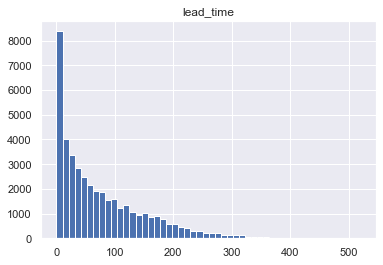

1588


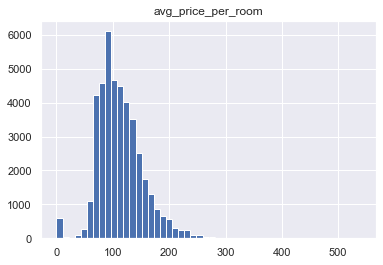

542


<IPython.core.display.Javascript object>

In [91]:
# plot columns that are skewed
cols_to_trans = ["lead_time", "avg_price_per_room"]
for colname in cols_to_trans:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))  # print number of values less than or equal to zero

* Unfortunately there are some non-positive values (exact zeros) so we can't take direct log of these numbers.
* We can try to add small value like 0.01 so we are not changing the data in a meaningful way or try other transformations like `sqrt` and `np.arcsinh`.

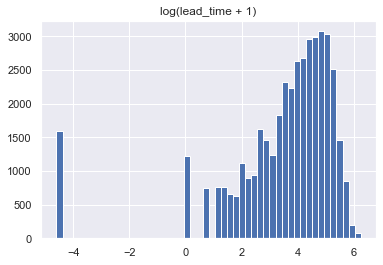

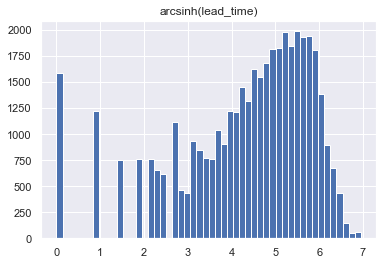

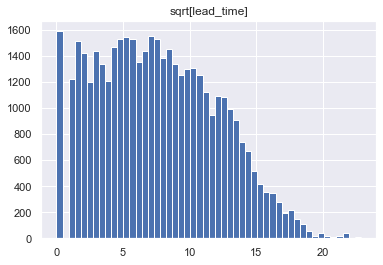

<IPython.core.display.Javascript object>

In [92]:
# plot log transformation of lead time
plt.hist(np.log(df["lead_time"] + 0.01), 50)
plt.title("log(lead_time + 1)")
plt.show()
# plot inverse hyperbolic sine transformation of lead time
plt.hist(np.arcsinh(df["lead_time"]), 50)
plt.title("arcsinh(lead_time)")
plt.show()
# plot square root transformation of lead time
plt.hist(np.sqrt(df["lead_time"]), 50)
plt.title("sqrt[lead_time]")
plt.show()

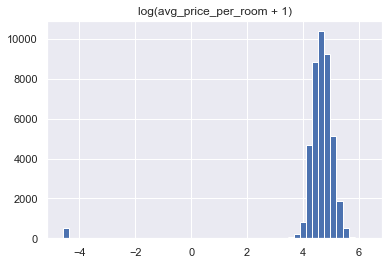

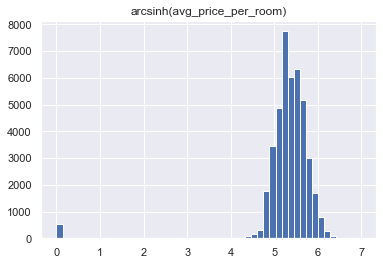

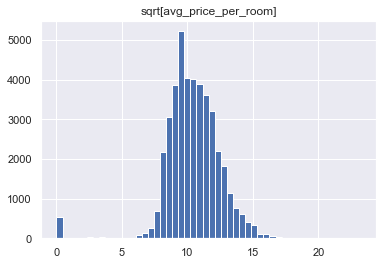

<IPython.core.display.Javascript object>

In [93]:
# plot log transformation of average price per room
plt.hist(np.log(df["avg_price_per_room"] + 0.01), 50)
plt.title("log(avg_price_per_room + 1)")
plt.show()
# plot inverse hyperbolic sine transformation of average price per room
plt.hist(np.arcsinh(df["avg_price_per_room"]), 50)
plt.title("arcsinh(avg_price_per_room)")
plt.show()
# plot square root transformation of average price per room
plt.hist(np.sqrt(df["avg_price_per_room"]), 50)
plt.title("sqrt[avg_price_per_room]")
plt.show()

We will choose square root transformation because it makes the data slightly less skewed without having to add a value to the data and may be more easily interpretable than the other transformations

In [94]:
# create a new copy of the data and apply square root transformation
X1 = df1.copy()
for colname in cols_to_trans:
    X1[colname + "_sqrt"] = np.sqrt(X1[colname])
X1.drop(cols_to_trans, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [95]:
X1.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  \
0       Meal Plan 1                           0        Room_Type 1   
1      Not Selected                           0        Room_Type 1   
2       Meal Plan 1                           0        Room_Type 1   
3       Meal Plan 1                           0        Room_Type 1   
4      Not Selected                           0        Room_Type 1   

   arrival_year  arrival_date market_segment_type  repeated_guest  \
0          2017             2             Offline               0   
1          2018             6              Online               0   
2          2018            28              Online               0   
3          2018            20              Online               0   
4          2019            13              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   no_of_special_requests  booking_canceled     month  lead_time_sqrt  \
0                       0                 0   October       14.966630   
1                       1                 0  November        2.236068   
2                       0                 1  February        1.000000   
3                       0                 1       May       14.525839   
4                       2                 1      July       16.643317   

   avg_price_per_room_sqrt  
0                 8.062258  
1                10.328601  
2                 7.745967  
3                10.000000  
4                 9.439280

<IPython.core.display.Javascript object>

In [96]:
# split data
X2 = X1.drop(["booking_canceled",], axis=1,)
y = X1["booking_canceled"]

# creating dummy variables
X2 = pd.get_dummies(X2, drop_first=True)

# splitting in training and test set
X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [97]:
# check training & test sets to make sure they are comparable
print("Shape of training set:", X2_train.shape)
print("Shape of test set:", X2_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of training set: (29733, 37)
Shape of test set: (12744, 37)
Percentage of classes in training set:
0    0.661588
1    0.338412
Name: booking_canceled, dtype: float64
Percentage of classes in test set:
0    0.652935
1    0.347065
Name: booking_canceled, dtype: float64


<IPython.core.display.Javascript object>

### Logistic Regression (with Sklearn library)

In [98]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg4 = model.fit(X2_train, y_train)

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [99]:
# predicting on training set
y_pred_train2 = lg4.predict(X2_train)

<IPython.core.display.Javascript object>

In [100]:
# training performance
log_reg_model_train_perf_sqrt = model_performance_classification_statsmodels(
    lg4, X2_train, y_train
)
print("Training performance:")
log_reg_model_train_perf_sqrt

Training performance:


Accuracy    Recall  Precision        F1
0  0.793226  0.638243   0.719149  0.676285

<IPython.core.display.Javascript object>

#### Checking performance on test set

In [101]:
# predicting on the test set
y_pred_test2 = lg4.predict(X2_test)

<IPython.core.display.Javascript object>

In [102]:
log_reg_model_test_perf_sqrt = model_performance_classification_statsmodels(
    lg4, X2_test, y_test
)
print("Test performance:")
log_reg_model_test_perf_sqrt

Test performance:


Accuracy   Recall  Precision        F1
0  0.789626  0.63102   0.726823  0.675542

<IPython.core.display.Javascript object>

* Scores are similar to model without square root transformation

### Logistic Regression (with statsmodels library)

In [103]:
# split data
X = df1.drop(["booking_canceled", "arrival_year"], axis=1)
y = df1["booking_canceled"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# splitting to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [104]:
# fit logit regression
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:       booking_canceled   No. Observations:                29733
Model:                          Logit   Df Residuals:                    29696
Method:                           MLE   Df Model:                           36
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.3404
Time:                        01:48:54   Log-Likelihood:                -12551.
converged:                      False   LL-Null:                       -19028.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.0021      0.256    -11.743      0.000      -3.503      -2.501
no_of_adults                            -0.0351      

<IPython.core.display.Javascript object>

In [105]:
# training performance
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.794303  0.624329   0.728939  0.672591

<IPython.core.display.Javascript object>

#### Observations
* Negative values of the coefficient show that probability of cancellation decreases with the increase of the corresponding attribute value.
* Positive values of the coefficient show that the probability of cancellation increases with the increase of corresponding attribute value.
* $p$-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05, then any variable with $p$-value < 0.05 would be considered significant.
* Variables may contain multicollinearity, which will affect the $p$-values.
* We should remove multicollinearity from data to get reliable coefficients and $p$-values.
* To detect for multicollinearity, we will use the Variance Inflation Factor (VIF)

In [106]:
# vif before feature selection
vif_series0 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series0))

Series before feature selection: 

const                                   268.323171
no_of_adults                              1.484452
no_of_children                            2.179179
no_of_weekend_nights                      1.088629
no_of_week_nights                         1.140954
required_car_parking_space                1.038128
lead_time                                 1.309824
arrival_date                              1.007115
repeated_guest                            2.046807
no_of_previous_cancellations              1.598834
no_of_previous_bookings_not_canceled      1.979028
avg_price_per_room                        2.921497
no_of_special_requests                    1.116389
type_of_meal_plan_Meal Plan 2             1.106498
type_of_meal_plan_Meal Plan 3             1.025056
type_of_meal_plan_Not Selected            1.280225
room_type_reserved_Room_Type 2            1.101009
room_type_reserved_Room_Type 3            1.001726
room_type_reserved_Room_Type 4            1.444

<IPython.core.display.Javascript object>

* `market_segment_type_Corporate`, `market_segment_type_Offline`, and `market_segment_type_Online` have VIF greater than 10. 
* We will remove multicollinearity one at a time and check to see if we need to remove more.

In [107]:
# drop column with high VIF
col_to_drop = "market_segment_type_Online"
x_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# check VIF again
vif_series1 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
    dtype=float,
)
print("Series after dropping {}: \n\n{}\n".format(col_to_drop, vif_series1))

Series after dropping market_segment_type_Online: 

const                                   50.392643
no_of_adults                             1.465521
no_of_children                           2.178552
no_of_weekend_nights                     1.088563
no_of_week_nights                        1.140885
required_car_parking_space               1.038114
lead_time                                1.305262
arrival_date                             1.007085
repeated_guest                           2.017450
no_of_previous_cancellations             1.598475
no_of_previous_bookings_not_canceled     1.977009
avg_price_per_room                       2.918400
no_of_special_requests                   1.113433
type_of_meal_plan_Meal Plan 2            1.106498
type_of_meal_plan_Meal Plan 3            1.025055
type_of_meal_plan_Not Selected           1.277363
room_type_reserved_Room_Type 2           1.100732
room_type_reserved_Room_Type 3           1.001725
room_type_reserved_Room_Type 4           1.43993

<IPython.core.display.Javascript object>

* Removal of `market_segment_type_Online` has fixed multicollinearity

In [108]:
# fit logit regression
logit2 = sm.Logit(y_train, x_train1.astype(float))
lg2 = logit2.fit()

         Current function value: 0.422127
         Iterations: 35


<IPython.core.display.Javascript object>

In [109]:
# training performance
print("Training performance:")
model_performance_classification_statsmodels(lg2, x_train1, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.794269  0.624329   0.728855  0.672555

<IPython.core.display.Javascript object>

* No significant change in the model performance

In [110]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:       booking_canceled   No. Observations:                29733
Model:                          Logit   Df Residuals:                    29697
Method:                           MLE   Df Model:                           35
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.3404
Time:                        01:49:02   Log-Likelihood:                -12551.
converged:                      False   LL-Null:                       -19028.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.0720      0.113    -27.136      0.000      -3.294      -2.850
no_of_adults                            -0.0364      

<IPython.core.display.Javascript object>

* The $p$-values are high for only some of the dummy variables of different attributes so we will drop them iteratively as $p$-values may change after dropping a variable.
* We will use a loop:
    * Build a model, check $p$-values of the variables, and drop the column with highest $p$-value
    * Create a new model without the dropped feature, check $p$-values, and drop the column with the highest $p$-value
    * Repeat above steps until there are no more variables with $p$-value > 0.05

In [111]:
# run a loop to drop variables with high p-value

# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'month_December', 'month_February', 'month_January', 'month_June', 'month_March', 'month_May', 'month_November']


<IPython.core.display.Javascript object>

In [112]:
# new training set with only selected features
x_train2 = x_train1[selected_features]

<IPython.core.display.Javascript object>

In [113]:
# fit logit regression to new training set
logit3 = sm.Logit(y_train, x_train2.astype(float))
lg3 = logit3.fit()

print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.422722
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       booking_canceled   No. Observations:                29733
Model:                          Logit   Df Residuals:                    29709
Method:                           MLE   Df Model:                           23
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.3395
Time:                        01:49:06   Log-Likelihood:                -12569.
converged:                       True   LL-Null:                       -19028.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.2630      0.095    -34.497    

<IPython.core.display.Javascript object>

Note: Removing variables with high $p$-values has enabled optimization to terminate successfully. Previously, the maximum number of iterations was exceeded.

**Now no feature has $p$-value > 0.05 so we will consider the features in x_train2 as the final ones and lg3 as the final model.**

### Coefficient Interpretations
* Coefficients of nights (both weekend nights and weeknights), lead time, number of previous cancellations, average price per room, no meal plan selected, and the months of February, March, and November are positive. An increase in these will lead to increase in chances of a booking being cancelled.
* Coefficients of required car parking space, arrival year, repeated guest, number of special request, meal plan 2, room types 4-7, Corporate and Offline market segments, and months December, January, June, and May are negative. An increase in these will lead to a decrease in chances of a booking being cancelled.

### Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odds); to find the odds we must take the exponential of the coefficients.
* That is, odds $= e^b$
* The percentage change in odds is given as odds $= (e^b-1)*100$

In [114]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing the limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train2.columns).T

const  no_of_weekend_nights  no_of_week_nights  \
Odds          0.038275              1.049479           1.112612   
Change_odd% -96.172499              4.947939          11.261206   

             required_car_parking_space  lead_time  repeated_guest  \
Odds                           0.217687   1.017069        0.021821   
Change_odd%                  -78.231349   1.706942      -97.817857   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.418057            1.018558   
Change_odd%                     41.805742            1.855848   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.264292                       0.810960   
Change_odd%              -73.570833                     -18.903951   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 4  \
Odds                               1.407088                        0.831120   
Change_odd%                       40.708757                      -16.887973   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                               0.610422                        0.644595   
Change_odd%                      -38.957756                      -35.540522   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                               0.323654                       0.552217   
Change_odd%                      -67.634569                     -44.778271   

             market_segment_type_Offline  month_December  month_February  \
Odds                            0.106383        0.315612        1.964228   
Change_odd%                   -89.361749      -68.438774       96.422799   

             month_January  month_June  month_March  month_May  month_November  
Odds              0.501816    0.865829     1.402416   0.798063        1.518814  
Change_odd%     -49.818352  -13.417107    40.241625 -20.193720       51.881435

<IPython.core.display.Javascript object>

### Coefficient interpretations
* `no_of_weekend_nights`: Holding all other features constant, increasing the booking by 1 weekend night will increase the odds of the booking being cancelled by 1.05 times or a 4.95% increase
* `no_of_week_nights`: Holding all other features constant, increasing the booking by 1 week night will increase the odds of cancellation by 1.11 times or 11.26% increase
* `required_car_parking_space`: Holding all other features constant, a booking with a car parking space required decreases the odds of cancellation by 78.23%
* `lead_time`: Holding all other features constant, increasing the lead time by a day will increase the odds of cancellation 1.71%
* `repeated_guest`: Holding all other features constant, the odds of a cancellation from a repeat guest is 97.82% less likely
* `no_of_previous_cancellations`: Holding all other features constant, increasing the number of previous cancellations by one unit will increase the odds of cancellation by 41.81%
* `avg_price_per_room`: Holding all other features constant, increasing the average price per room by 1 unit will increase the odds of cancellation by 1.86%
* `no_of_special_requests`: Holding all other features constant, increasing the number of special requests by 1 unit will decrease the odds of cancellation by 73.57%
* `type_of_meal_plan`: Holding all other features constant, selecting meal plan 2 will decrease the odds of cancellation by 18.9% while no selection of a meal will increase the odds by 40.71%
* `type_of_room_reserved`: Holding all other features constant, reservation of room types 4, 5, 6, and 7 each decrease the odds of cancellation by 16.89%, 38.96%, 35.54%, and 67.63%, respectively
* `market_segment_type`: Holding all other features constant, Corporate and Offline market types will each decrease the odds of cancellation by 44.78% and 89.36%, respectively
* `arrival_month`: Holding all other features constant, arriving in the months of January, May, June, and December each decrease the odds of cancellation by 49.82%, 20.19%, 13.42%, and 68.44%, respectively. Arriving in the months of February, March, and November increase the odds of cancellation by 96.42%, 40.24%, and 51.88%, respectively

### Checking model performance on the training set

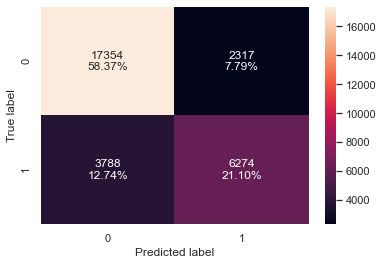

<IPython.core.display.Javascript object>

In [115]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train2, y_train)

In [116]:
# logit regression model training performance
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, x_train2, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.794673  0.623534   0.730299  0.672707

<IPython.core.display.Javascript object>

### ROC-AUC

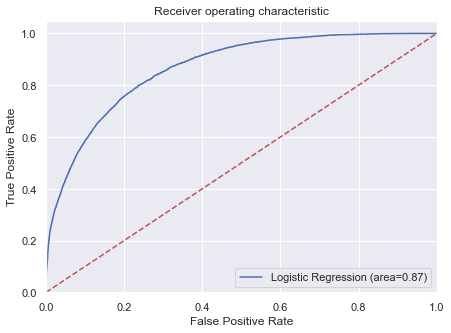

<IPython.core.display.Javascript object>

In [117]:
# ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(x_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area=%0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement
* Let's see if F1 score can be improved further, by changing the model threshold using AUC-ROC curve

### Optimal threshold using AUC-ROC curve

In [118]:
# optimal threshold as per AUC-ROC curve
# optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.32280954710436865


<IPython.core.display.Javascript object>

### Checking model performance on training set

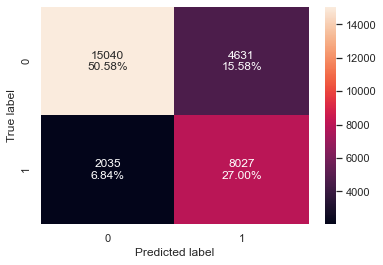

<IPython.core.display.Javascript object>

In [119]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [120]:
# checking performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.775805  0.797754   0.634144  0.706602

<IPython.core.display.Javascript object>

* Recall and F1 have improved but accuracy and precision have decreased

**Let's use Precision-Recall curve and see if we can find a better threshold**

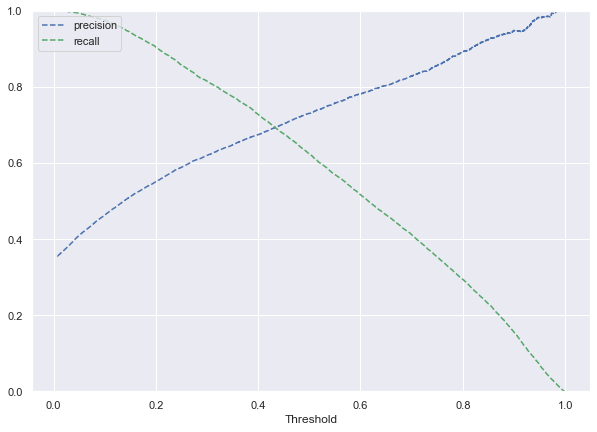

<IPython.core.display.Javascript object>

In [121]:
y_scores = lg3.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [122]:
# setting the threshold
optimal_threshold_curve = 0.43

<IPython.core.display.Javascript object>

### Checking model performance on training set

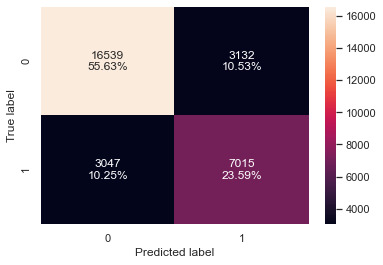

<IPython.core.display.Javascript object>

In [123]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train2, y_train, threshold=optimal_threshold_curve)

In [124]:
# training performance
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.792184  0.697177   0.691337  0.694245

<IPython.core.display.Javascript object>

* There is not much improvement in the model performance as the default threshold is 0.50 and here we got 0.43 as the optimal threshold

### Model Performance Summary

In [125]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf_sklearn.T,
        log_reg_model_train_perf_sqrt.T,
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression with Sqrt Transformation",
    "Logistic Regression statsmodels",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  \
Accuracy                      0.794202   
Recall                        0.623932   
Precision                     0.728898   
F1                            0.672343   

           Logistic Regression with Sqrt Transformation  \
Accuracy                                       0.793226   
Recall                                         0.638243   
Precision                                      0.719149   
F1                                             0.676285   

           Logistic Regression statsmodels  \
Accuracy                          0.794673   
Recall                            0.623534   
Precision                         0.730299   
F1                                0.672707   

           Logistic Regression-0.32 Threshold  \
Accuracy                             0.775805   
Recall                               0.797754   
Precision                            0.634144   
F1                                   0.706602   

           Logistic Regression-0.43 Threshold  
Accuracy                             0.792184  
Recall                               0.697177  
Precision                            0.691337  
F1                                   0.694245

<IPython.core.display.Javascript object>

### Let's check performance on the test set

Dropping the columns from the test set that were dropped from the training set

In [126]:
x_test2 = X_test[list(x_train2.columns)]

<IPython.core.display.Javascript object>

Using model with default threshold

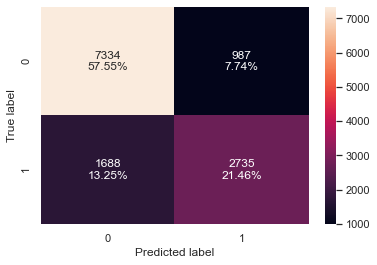

<IPython.core.display.Javascript object>

In [127]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test2, y_test)

In [128]:
# test performance
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, x_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.790097  0.618359    0.73482  0.671578

<IPython.core.display.Javascript object>

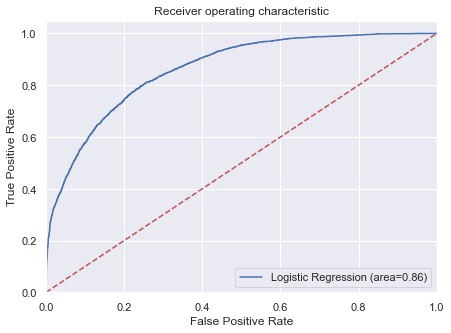

<IPython.core.display.Javascript object>

In [129]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(x_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area=%0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold = 0.32**

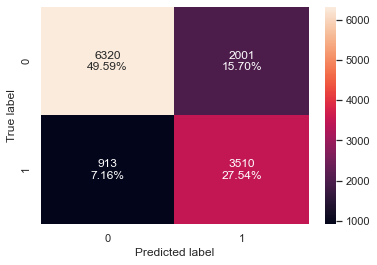

<IPython.core.display.Javascript object>

In [130]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test2, y_test, threshold=optimal_threshold_auc_roc)

In [131]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.771343  0.793579   0.636908  0.706664

<IPython.core.display.Javascript object>

**Using model with threshold = 0.43**

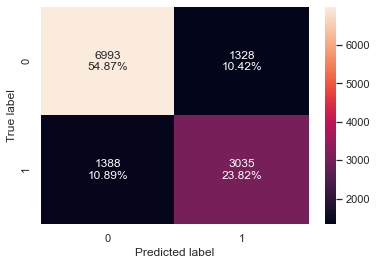

<IPython.core.display.Javascript object>

In [132]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test2, y_test, threshold=optimal_threshold_curve)

In [133]:
# test performance
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0   0.78688  0.686186   0.695622  0.690872

<IPython.core.display.Javascript object>

### Model performance summary

In [134]:
# training performance summary
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  \
Accuracy                      0.794202   
Recall                        0.623932   
Precision                     0.728898   
F1                            0.672343   

           Logistic Regression with Sqrt Transformation  \
Accuracy                                       0.793226   
Recall                                         0.638243   
Precision                                      0.719149   
F1                                             0.676285   

           Logistic Regression statsmodels  \
Accuracy                          0.794673   
Recall                            0.623534   
Precision                         0.730299   
F1                                0.672707   

           Logistic Regression-0.32 Threshold  \
Accuracy                             0.775805   
Recall                               0.797754   
Precision                            0.634144   
F1                                   0.706602   

           Logistic Regression-0.43 Threshold  
Accuracy                             0.792184  
Recall                               0.697177  
Precision                            0.691337  
F1                                   0.694245

<IPython.core.display.Javascript object>

In [135]:
# test performance summary

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf_sklearn.T,
        log_reg_model_test_perf_sqrt.T,
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression with Sqrt Transformation",
    "Logistic Regression with statsmodels",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  \
Accuracy                      0.790333   
Recall                        0.620393   
Precision                     0.734279   
F1                            0.672549   

           Logistic Regression with Sqrt Transformation  \
Accuracy                                       0.789626   
Recall                                         0.631020   
Precision                                      0.726823   
F1                                             0.675542   

           Logistic Regression with statsmodels  \
Accuracy                               0.790097   
Recall                                 0.618359   
Precision                              0.734820   
F1                                     0.671578   

           Logistic Regression-0.32 Threshold  \
Accuracy                             0.771343   
Recall                               0.793579   
Precision                            0.636908   
F1                                   0.706664   

           Logistic Regression-0.43 Threshold  
Accuracy                             0.786880  
Recall                               0.686186  
Precision                            0.695622  
F1                                   0.690872

<IPython.core.display.Javascript object>

## Conclusion
* We have been able to build a predictive model that can be used by Star Hotels to determine which bookings will lead to cancellations with an F1 score of 0.71 and recall score of 0.80 on the training set
* All the logistic regression models have given a giveneralized performance on the training and test set
* Coefficients of number of weekend nights, number of week nights, lead time, average price per room, one type of meal plan, and certain arrival months are positive. An increase in these will lead to an increase in the chances of a cancellation
* Coefficients of required car parking space, arrival year, certain market segment types, repeated guest, number of special requests, and no selection of meal plan are negative. An increase in these will lead to a decrease in the chances of a cancellation

## Recommendations
* From our logistic regression model we identified that longer stays can be a predictor for cancellation
* Star Hotels should try to keep room prices competetive, to avoid cancellation. If rates are too high to begin with, there will be more cancellations and then the hotel may have to lower prices significantly at the last minute or spend money on resources to sell the room
* Bookings that are made without meal plans as well as those without special requests have higher odds for cancellation. Since the majority of bookings are made online, make the special requests and meal plan types look more enticing. Customers may be more hesitant to cancel if their booking is more personalized to their specific desires.
* Long lead time increases the odds of cancellation, particularly online. Two ideas:
    - Limit the lead time allowed for an online reservation, but make it clear that customers may call for a reservation beyond the lead time or submit a form to have someone call them
    - Set up a reminder for reservations with long lead time to send text message to customer, say, 1-2 months out, asking if there are any changes to the reservation
* Repeat guests have much lower odds of cancellation so the hotel should focus on customer retention 
    - Free loyalty program that provides increasingly more low-cost perks
    - Offer short-leadtime complimentary rooms for frequent guests for rooms that cannot be sold quickly
* Our analysis showed that February, March, and November had increased odds of cancellation while January, May, June and December each decrease the odds of cancellation. During months with increased odds, strategically double book some percentage of rooms and during months with decreased odds, avoid double booking rooms.

## Split Data for Decision Tree

In [136]:
# split data
X = df1.drop(["booking_canceled", "arrival_year"], axis=1)
y = df1["booking_canceled"].astype("int64")

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [137]:
# check training & test sets to make sure they are comparable
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of training set: (29733, 36)
Shape of test set: (12744, 36)
Percentage of classes in training set:
0    0.661588
1    0.338412
Name: booking_canceled, dtype: float64
Percentage of classes in test set:
0    0.652935
1    0.347065
Name: booking_canceled, dtype: float64


<IPython.core.display.Javascript object>

### Build Decision Tree Model
* We will build our model using the DecisionTreeClassifier function, using default 'gini' criteria to split
* We can use "balanced" class_weight or dictionary {0:0.35, 1:0.65} to the model to specify the weight of each class and give a particular weight to class 1.

In [138]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight="balanced", random_state=1
)

<IPython.core.display.Javascript object>

In [139]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

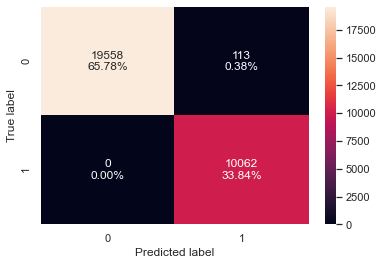

<IPython.core.display.Javascript object>

In [140]:
# confusion matrix of training data using model
confusion_matrix_statsmodels(model, X_train, y_train)

In [141]:
# training performance
decision_tree_perf_train = model_performance_classification_statsmodels(
    model, X_train, y_train
)
print("Training performance:")
decision_tree_perf_train

Training performance:


Accuracy  Recall  Precision        F1
0    0.9962     1.0   0.988894  0.994416

<IPython.core.display.Javascript object>

* Model is able to almost perfectly classify all the data points on the training set. 
* 113 (0.38%) errors on the training set
* Decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set, which leads to overfitting
* With overfitting, the model will perform very well on the training set but poorly on the test set

### Checking model performance on the test set

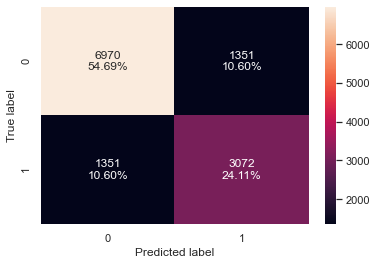

<IPython.core.display.Javascript object>

In [142]:
# confusion matrix for test set using model
confusion_matrix_statsmodels(model, X_test, y_test)

In [143]:
# test performance
decision_tree_perf_test = model_performance_classification_statsmodels(
    model, X_test, y_test
)
print("Test performance:")
decision_tree_perf_test

Test performance:


Accuracy    Recall  Precision        F1
0  0.787979  0.694551   0.694551  0.694551

<IPython.core.display.Javascript object>

* There is a huge disparity in performance of model on training set and test set, which suggests the model is overfitting

## Visualizing the Decision Tree

In [144]:
# creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

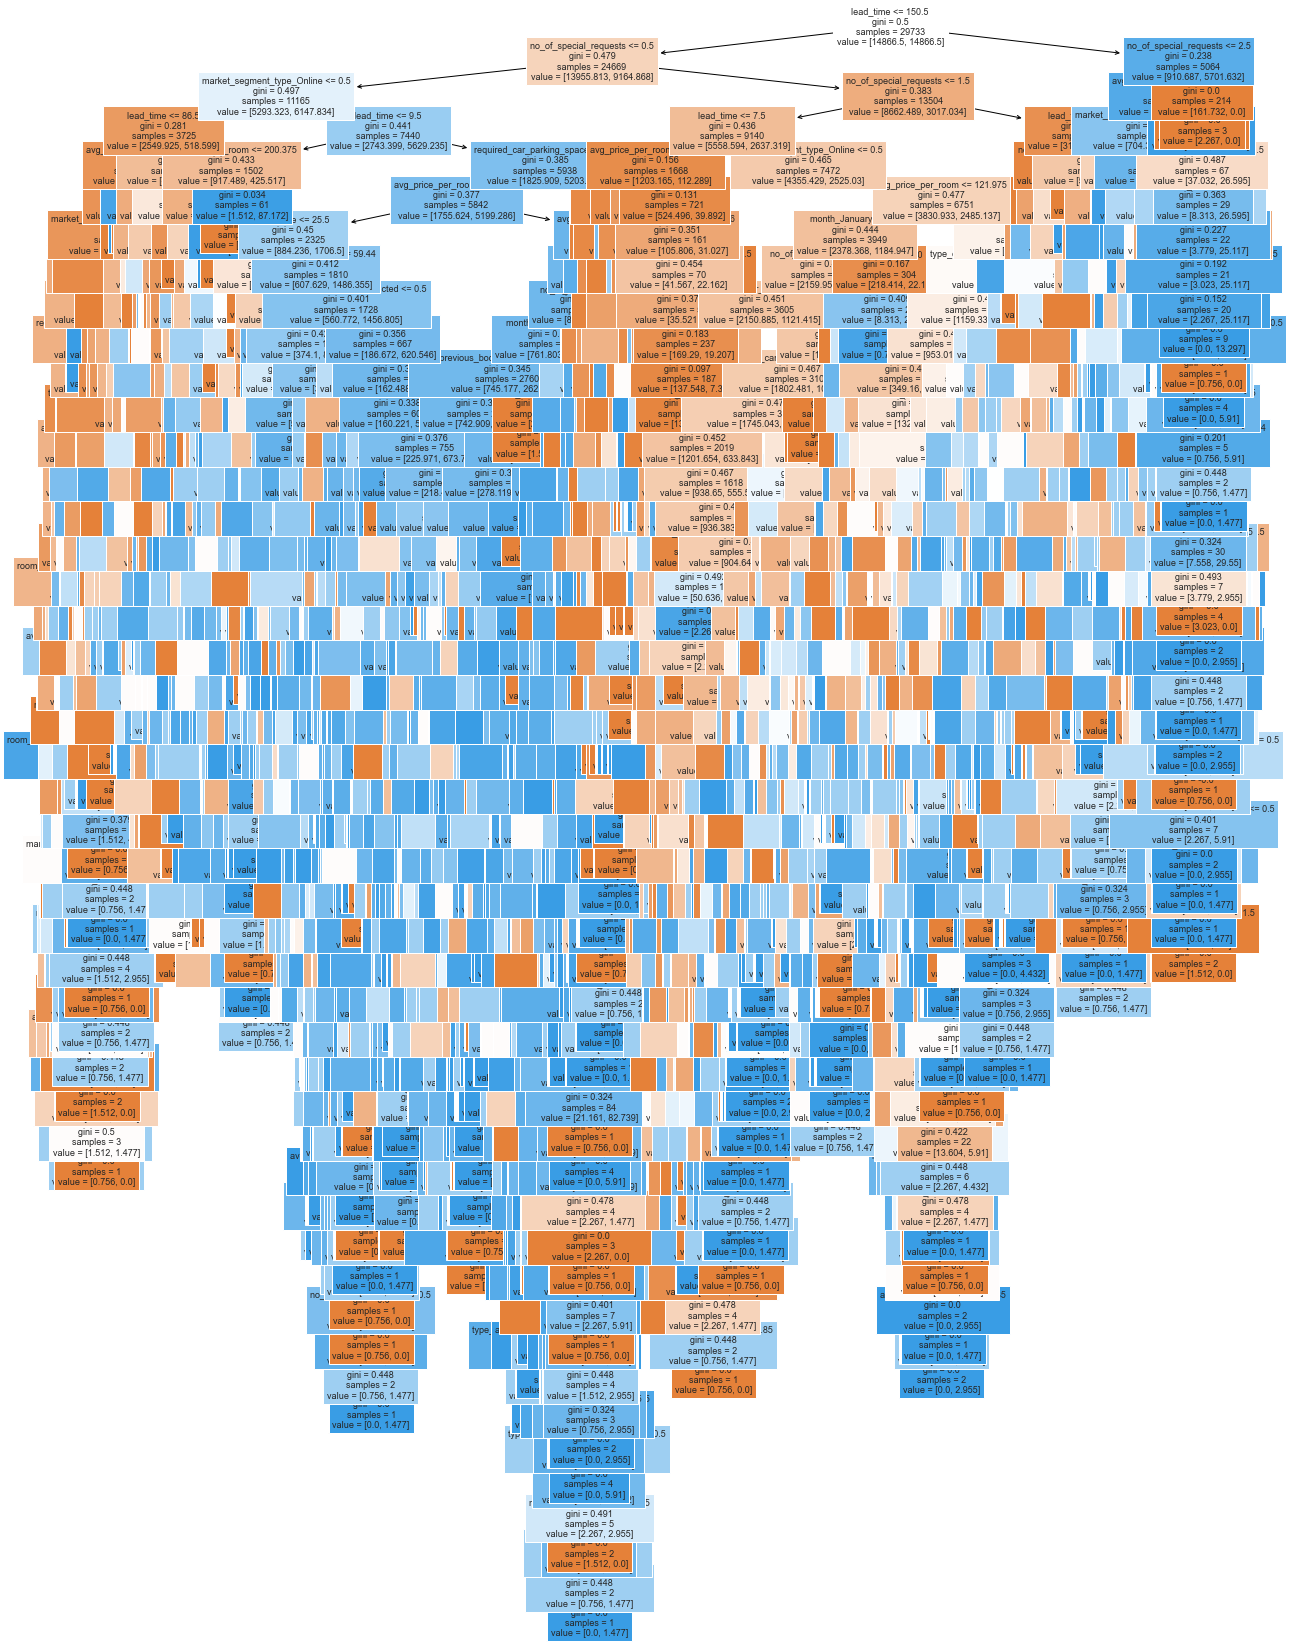

<IPython.core.display.Javascript object>

In [145]:
# visualizing the tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [146]:
# text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 86.50
|   |   |   |   |--- avg_price_per_room <= 202.50
|   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 59.50
|   |   |   |   |   |   |   |   |--- weights: [77.09, 0.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  59.50
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |   |   |   |--- required_car_parking_space <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- month_December <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |   |   |   |   |   |   |   |--- month_December >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [24.94, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- required_car_parkin

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret

In [147]:
# importance of features in the tree building
# (The importance of a feature is computed as the (normalized)
# total reduction of the criterion brought by that feature.
# It is also known as the Gini importance)

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                               Imp
lead_time                             3.417093e-01
avg_price_per_room                    1.454052e-01
no_of_special_requests                1.080493e-01
arrival_date                          9.539203e-02
market_segment_type_Online            9.517904e-02
no_of_week_nights                     4.925279e-02
no_of_weekend_nights                  3.023794e-02
no_of_adults                          1.536033e-02
month_December                        1.171987e-02
required_car_parking_space            1.009128e-02
type_of_meal_plan_Not Selected        8.510193e-03
month_July                            8.018408e-03
month_January                         7.583812e-03
month_August                          7.560938e-03
month_June                            7.081513e-03
month_February                        6.859950e-03
month_October                         6.330277e-03
month_September                       6.300855e-03
month_March                    

<IPython.core.display.Javascript object>

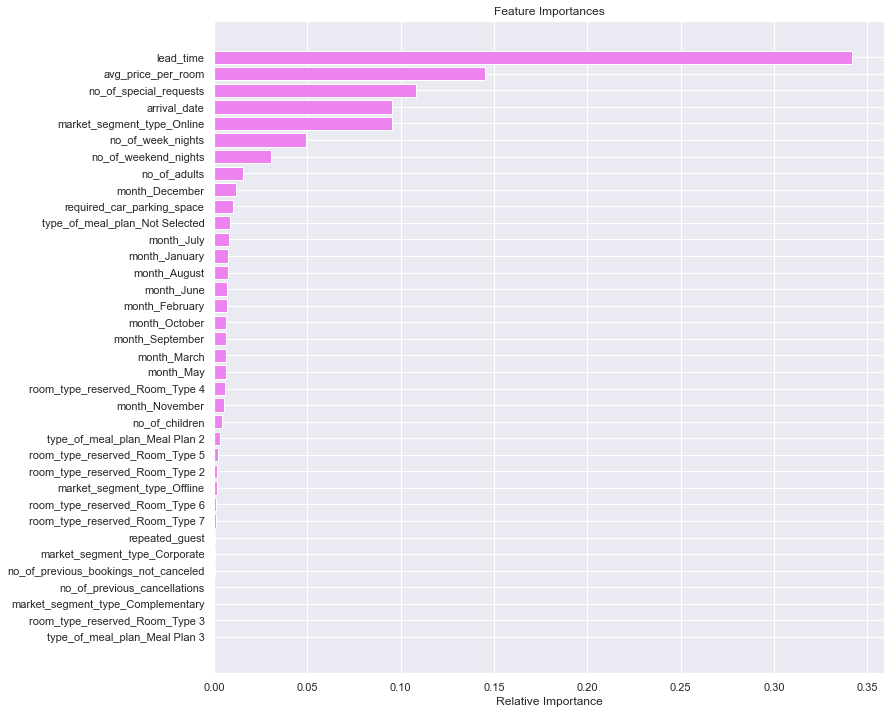

<IPython.core.display.Javascript object>

In [148]:
# plot importances
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, `lead_time` is the most important variable for predicting cancellation

### Reducing over fitting
* We will use GridSearch for attempt to compute the optimum values of hyperparameters

In [149]:
# choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 9, 2),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    #     "min_samples_split": [50, 100],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
}

# type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

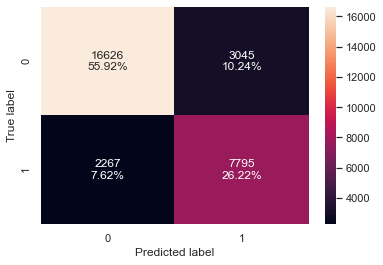

<IPython.core.display.Javascript object>

In [150]:
# confusion matrix of training set using estimator
confusion_matrix_statsmodels(estimator, X_train, y_train)

In [151]:
# check performance on training set
decision_tree_tune_perf_train = model_performance_classification_statsmodels(
    estimator, X_train, y_train
)
print("Training set performance:")
decision_tree_tune_perf_train

Training set performance:


Accuracy    Recall  Precision        F1
0  0.821343  0.774697   0.719096  0.745862

<IPython.core.display.Javascript object>

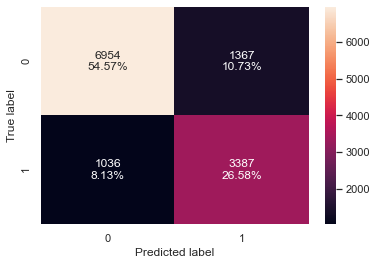

<IPython.core.display.Javascript object>

In [152]:
# confusion matrix of test set using estimator
confusion_matrix_statsmodels(estimator, X_test, y_test)

In [153]:
# check performance on the test set
decision_tree_tune_perf_test = model_performance_classification_statsmodels(
    estimator, X_test, y_test
)
print("Training set performance:")
decision_tree_tune_perf_test

Training set performance:


Accuracy   Recall  Precision       F1
0  0.811441  0.76577   0.712453  0.73815

<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

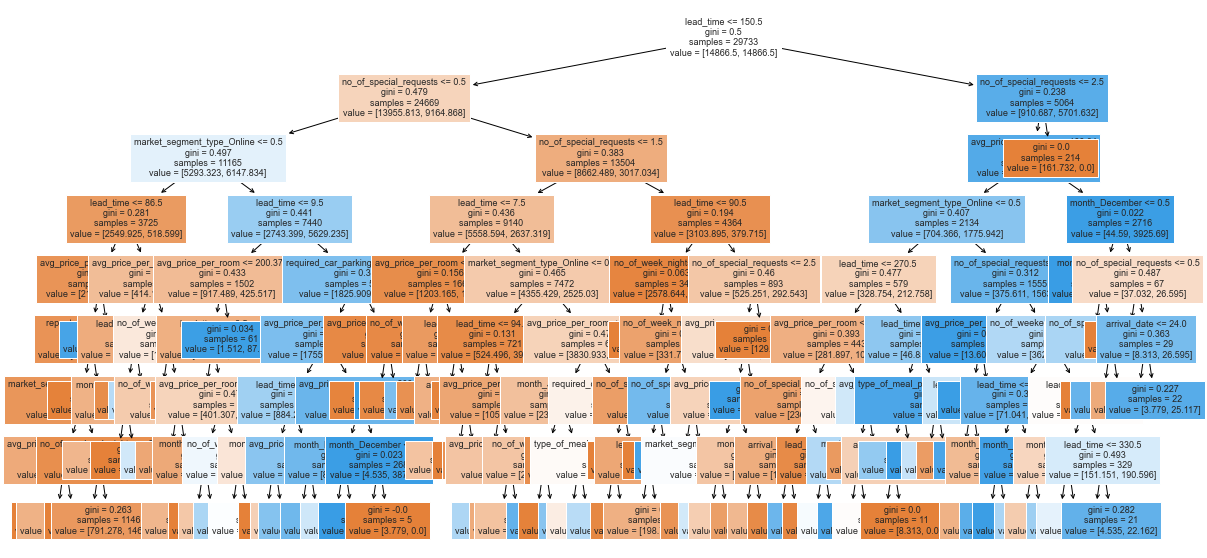

<IPython.core.display.Javascript object>

In [154]:
# visualizing the tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [155]:
# text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 86.50
|   |   |   |   |--- avg_price_per_room <= 202.50
|   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 59.50
|   |   |   |   |   |   |   |   |--- weights: [77.09, 0.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  59.50
|   |   |   |   |   |   |   |   |--- weights: [421.71, 164.00] class: 0
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [557.75, 0.00] class: 0
|   |   |   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |   |   |--- weights: [791.28, 146.27] class: 0
|   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |--- weights: [287.19,

<IPython.core.display.Javascript object>

### Observations from the tree:
Using the above extracted decision rules we can make interpretations from the decision tree model like:
    * For a booking with lead time no more than 86.5 days with 0 special requests, by a non-repeat guest that is neither from Online nor Offline market segments, with average price per room no more than 59.50 euro, the booking will not be canceled. But if the average price per room is greater than 59.50 euro, the booking will be canceled.
    
`Interpretations from other decision rules can be made in a similar manner.`

In [156]:
# importance of features in the tree building

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.443857
no_of_special_requests                0.215326
market_segment_type_Online            0.190662
avg_price_per_room                    0.083628
required_car_parking_space            0.015646
no_of_week_nights                     0.011815
no_of_weekend_nights                  0.009792
month_January                         0.009545
month_December                        0.008776
market_segment_type_Offline           0.002803
type_of_meal_plan_Not Selected        0.002349
arrival_date                          0.001967
repeated_guest                        0.001335
month_July                            0.000584
month_May                             0.000505
month_March                           0.000499
type_of_meal_plan_Meal Plan 2         0.000475
month_February                        0.000438
month_June                            0.000000
month_November                        0.000000
month_October

<IPython.core.display.Javascript object>

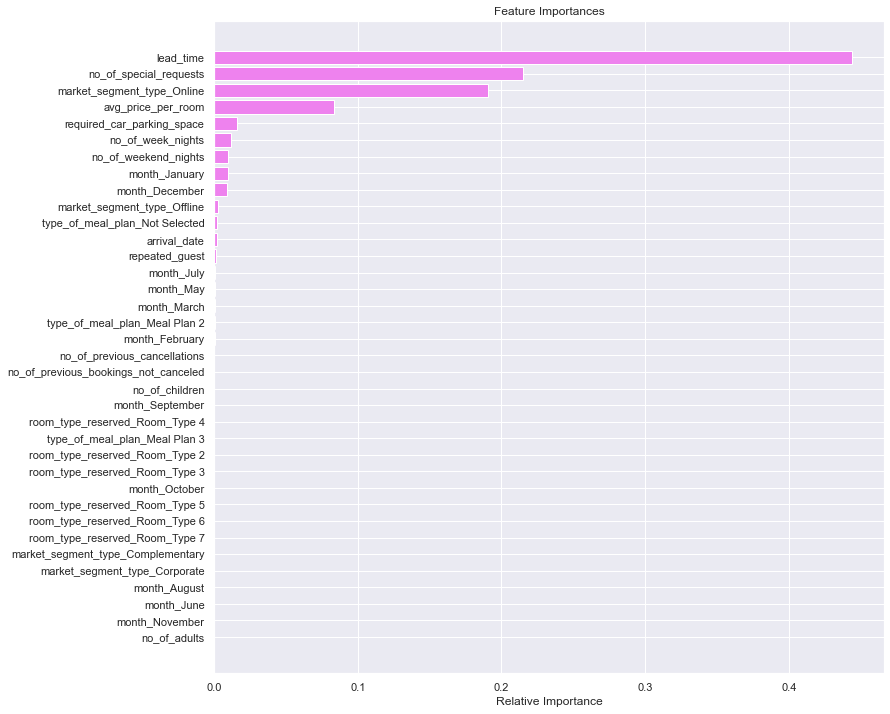

<IPython.core.display.Javascript object>

In [157]:
# plot importances
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the tuned decision tree, `lead_time` is still the most important feature, followed by `no_of_special_requests`

## Cost Complexity Pruning

In [158]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.35, 1: 0.65})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [159]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.003830
1    -1.355253e-20    0.003830
2    -1.355253e-20    0.003830
3    -1.355253e-20    0.003830
4    -1.355253e-20    0.003830
...            ...         ...
2799  8.072411e-03    0.333808
2800  8.391700e-03    0.342199
2801  1.374313e-02    0.355942
2802  3.387110e-02    0.423685
2803  7.598606e-02    0.499671

[2804 rows x 2 columns]

<IPython.core.display.Javascript object>

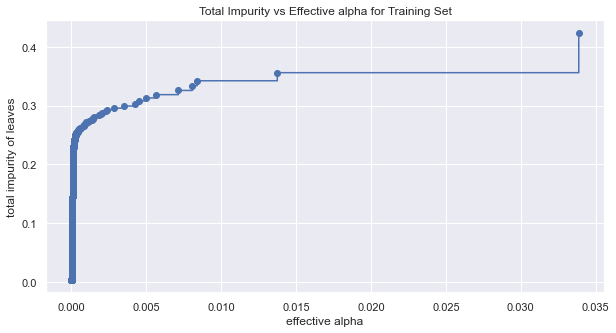

<IPython.core.display.Javascript object>

In [160]:
# plot total impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective alpha for Training Set")
plt.show()

Next, train a decision tree using the effective alphas. Last value in ccp_alphas is the alpha value that prunes the whole tree, `clfs[-1]`, with one node

In [161]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.35, 1: 0.65}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha: 0.07598605813687509


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in `clfs` and `ccp_alphas`, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

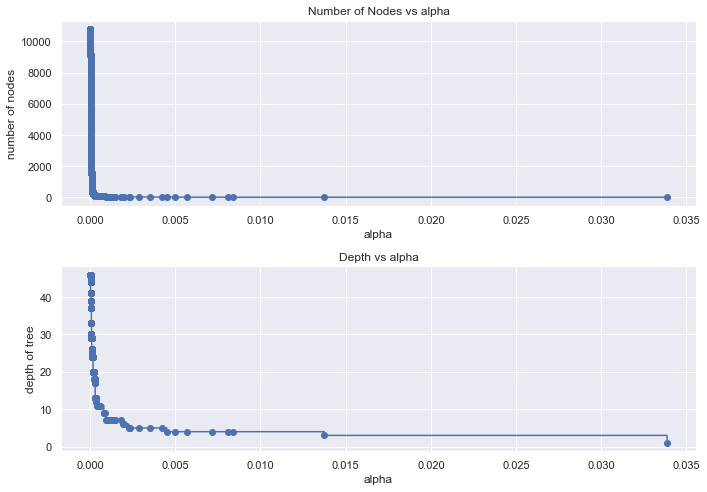

<IPython.core.display.Javascript object>

In [162]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of Nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [163]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [164]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [165]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

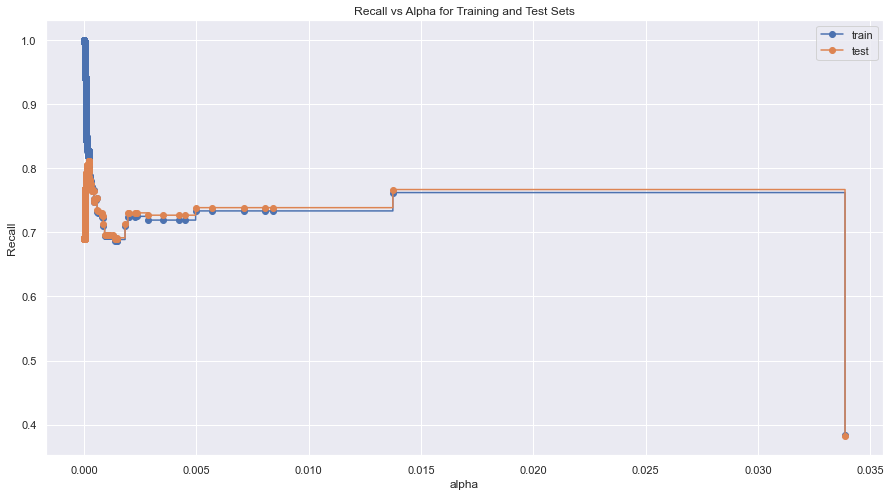

<IPython.core.display.Javascript object>

In [166]:
# visualize recall vs alpha for training/test sets
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs Alpha for Training and Test Sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(
    ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post",
)
ax.legend()
plt.show()

In [167]:
# create model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00020705683409440352,
                       class_weight={0: 0.35, 1: 0.65}, random_state=1)


<IPython.core.display.Javascript object>

In [168]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00020705683409440352,
                       class_weight={0: 0.35, 1: 0.65}, random_state=1)

<IPython.core.display.Javascript object>

**Checking performance on training set**

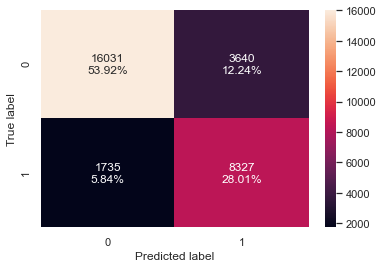

<IPython.core.display.Javascript object>

In [169]:
# confusion matrix on training set using best model
confusion_matrix_statsmodels(best_model, X_train, y_train)

In [170]:
# training performance
print("Training performance:")
model_performance_classification_statsmodels(best_model, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.819224  0.827569    0.69583  0.756003

<IPython.core.display.Javascript object>

**Checking performance on test set**

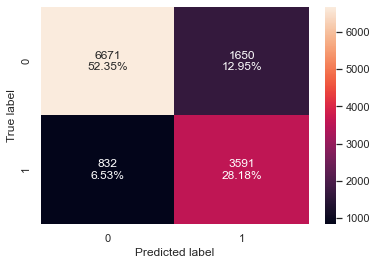

<IPython.core.display.Javascript object>

In [171]:
# confusion matrix on test set using best model
confusion_matrix_statsmodels(best_model, X_test, y_test)

In [172]:
# test performance
print("Test performance:")
model_performance_classification_statsmodels(best_model, X_test, y_test)

Test performance:


Accuracy    Recall  Precision        F1
0  0.805242  0.811892   0.685175  0.743171

<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

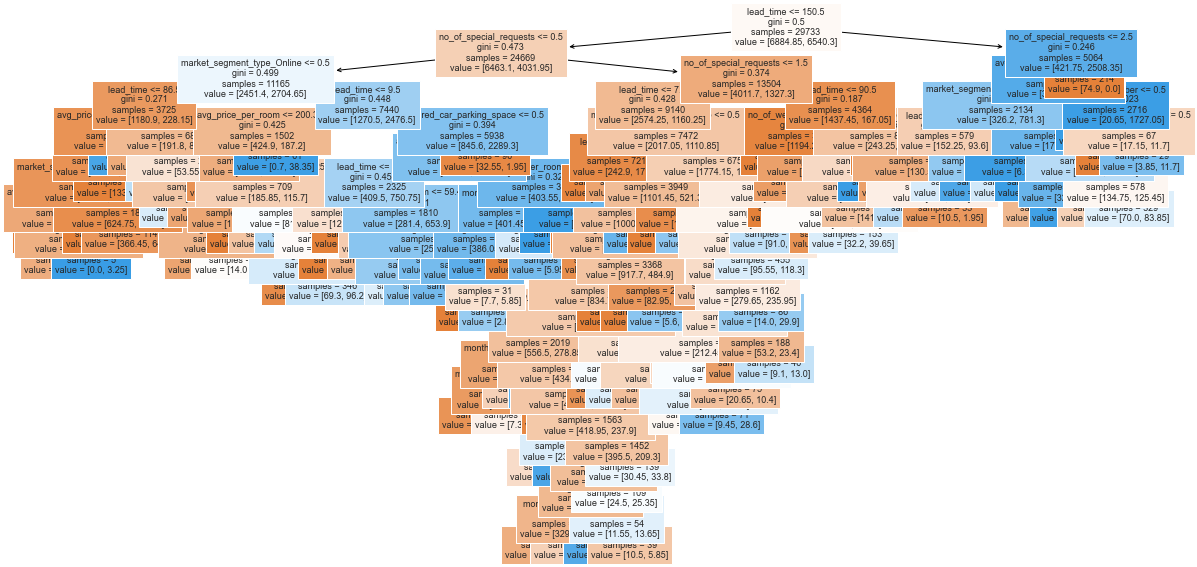

<IPython.core.display.Javascript object>

In [173]:
# visualizing the tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [174]:
# text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 86.50
|   |   |   |   |--- avg_price_per_room <= 202.50
|   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 59.50
|   |   |   |   |   |   |   |   |--- weights: [35.70, 0.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  59.50
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |   |   |   |--- weights: [195.30, 68.90] class: 0
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights >  3.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.25] class: 1
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [258.30, 0.00] class: 0
|   |   |   |   |   |

<IPython.core.display.Javascript object>

In [175]:
# importance of features in the tree building

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.439063
no_of_special_requests                0.202773
market_segment_type_Online            0.182503
avg_price_per_room                    0.092952
required_car_parking_space            0.016974
month_December                        0.013761
no_of_weekend_nights                  0.011356
no_of_week_nights                     0.010367
month_January                         0.009073
type_of_meal_plan_Not Selected        0.004676
market_segment_type_Offline           0.002562
month_July                            0.002264
month_February                        0.002154
month_October                         0.001394
repeated_guest                        0.001207
month_November                        0.001080
no_of_adults                          0.000988
month_May                             0.000918
arrival_date                          0.000916
month_August                          0.000825
month_March  

<IPython.core.display.Javascript object>

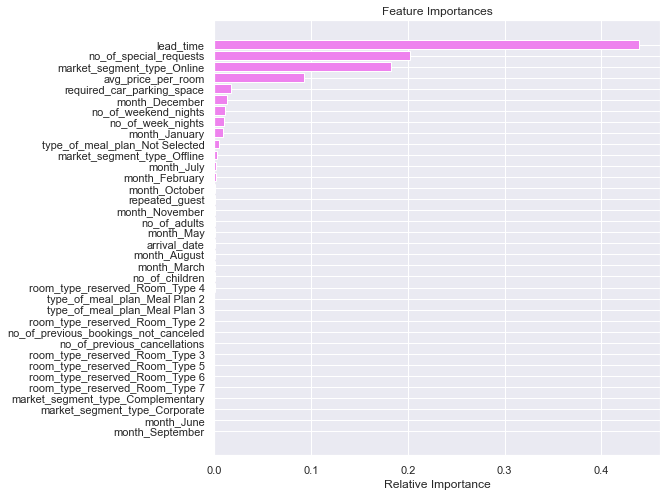

<IPython.core.display.Javascript object>

In [176]:
# plot feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This model is still quite complicated and not very easy to interpret

**Creating model with 0.005 ccp_alpha**

In [177]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.005, class_weight={0: 0.35, 1: 0.65}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight={0: 0.35, 1: 0.65},
                       random_state=1)

<IPython.core.display.Javascript object>

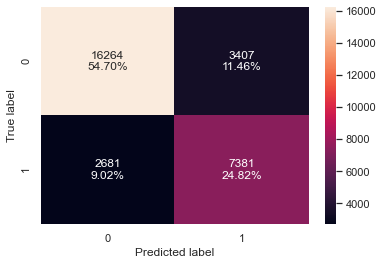

<IPython.core.display.Javascript object>

In [178]:
# confusion matrix for training set using best model with chosen alpha
confusion_matrix_statsmodels(best_model2, X_train, y_train)

In [179]:
# training performance
decision_tree_postpruned_perf_train = model_performance_classification_statsmodels(
    best_model2, X_train, y_train
)
print("Training performance:")
decision_tree_postpruned_perf_train

Training performance:


Accuracy    Recall  Precision       F1
0  0.795244  0.733552   0.684186  0.70801

<IPython.core.display.Javascript object>

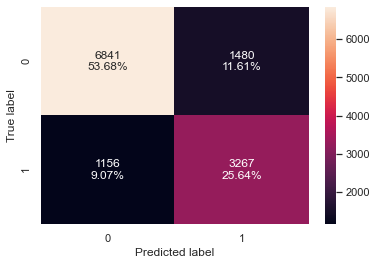

<IPython.core.display.Javascript object>

In [180]:
# confusion matrix for test set using best model with chosen alpha
confusion_matrix_statsmodels(best_model2, X_test, y_test)

In [181]:
# test performance
decision_tree_postpruned_perf_test = model_performance_classification_statsmodels(
    best_model2, X_test, y_test
)
print("Test performance:")
decision_tree_postpruned_perf_test

Test performance:


Accuracy    Recall  Precision        F1
0  0.793158  0.738639   0.688224  0.712541

<IPython.core.display.Javascript object>

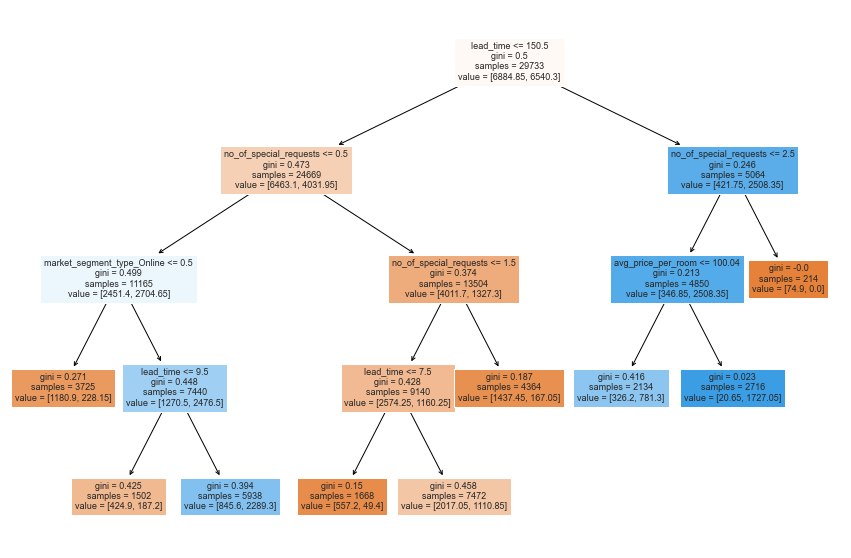

<IPython.core.display.Javascript object>

In [182]:
# visualize the tree
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [183]:
# text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [1180.90, 228.15] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 9.50
|   |   |   |   |--- weights: [424.90, 187.20] class: 0
|   |   |   |--- lead_time >  9.50
|   |   |   |   |--- weights: [845.60, 2289.30] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- lead_time <= 7.50
|   |   |   |   |--- weights: [557.20, 49.40] class: 0
|   |   |   |--- lead_time >  7.50
|   |   |   |   |--- weights: [2017.05, 1110.85] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [1437.45, 167.05] class: 0
|--- lead_time >  150.50
|   |--- no_of_special_requests <= 2.50
|   |   |--- avg_price_per_room <= 100.04
|   |   |   |--- weights: [326.20, 781.30] class: 1
|   |   |--- avg_price_per_room >  100.04
|   |   |   |--- weights: [20.65, 1727

<IPython.core.display.Javascript object>

In [184]:
# importance of features in the tree building

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.510867
no_of_special_requests                0.242488
market_segment_type_Online            0.203417
avg_price_per_room                    0.043228
no_of_adults                          0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000
month_August                          0.000000
month_December                        0.000000
month_February                        0.000000
month_January                         0.000000
room_type_reserved_Room_Type 7        0.000000
month_July                            0.000000
month_June                            0.000000
month_March                           0.000000
month_May                             0.000000
month_November                        0.000000
month_October                         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_res

<IPython.core.display.Javascript object>

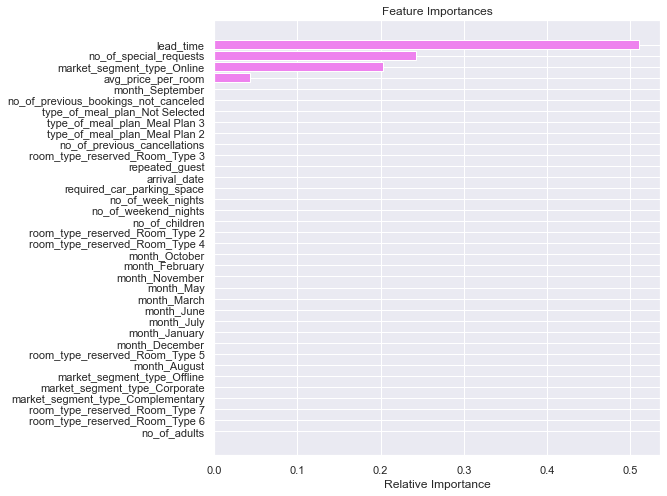

<IPython.core.display.Javascript object>

In [185]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time and number of special requests are the top two most important features to predict cancellations

### Comparing all decision tree models

In [186]:
# training performance comparison

models_tree_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_tree_train_comp_df.columns = [
    "Original Decision Tree",
    "Pre-Pruned Decision Tree",
    "Post-Pruned Decision Tree",
]

print("Training performance comparison:")
models_tree_train_comp_df

Training performance comparison:


Original Decision Tree  Pre-Pruned Decision Tree  \
Accuracy                 0.996200                  0.821343   
Recall                   1.000000                  0.774697   
Precision                0.988894                  0.719096   
F1                       0.994416                  0.745862   

           Post-Pruned Decision Tree  
Accuracy                    0.795244  
Recall                      0.733552  
Precision                   0.684186  
F1                          0.708010

<IPython.core.display.Javascript object>

In [187]:
# training performance comparison

models_tree_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_tree_test_comp_df.columns = [
    "Original Decision Tree",
    "Pre-Pruned Decision Tree",
    "Post-Pruned Decision Tree",
]

print("Test performance comparison:")
models_tree_test_comp_df

Test performance comparison:


Original Decision Tree  Pre-Pruned Decision Tree  \
Accuracy                 0.787979                  0.811441   
Recall                   0.694551                  0.765770   
Precision                0.694551                  0.712453   
F1                       0.694551                  0.738150   

           Post-Pruned Decision Tree  
Accuracy                    0.793158  
Recall                      0.738639  
Precision                   0.688224  
F1                          0.712541

<IPython.core.display.Javascript object>

* Decision tree model with pre-pruning has the best recall and f1 scores on the training and test data
* Decision tree model with post-pruning has reasonable recall and f1 scores, with a great reduction in overfitting, and the model is giving a generalized performance

### Conclusions
* We analyzed data from Star Hotels using different techniques and used Decision Tree Classifier to build a predictive model for the same purpose
* The model build can be used to predict if a guest who has booked a hotel stay will cancel or not
* We visualized different trees and their confusion matrices to get a better understanding of the models. Easy interpretation is one of the key benefits of Decision Trees
* We verified the fact that much less data preparation is needed for Decision Trees and such a simple model gave good results, even with outliers and imbalanced classes, which shows that the Decision Trees are robust
* `lead_time`, `no_of_special_requests`, Online `market_segment_type`, and `avg_price_per_room` are the most important variables in predicting the customers that will contribute to cancellations
* We shows the importance of hyper-parameters/pruning to reduce overfitting

### Recommendations
* According to the decision tree model:
    a) If a customer's lead time is greater than 150 days, there is a high chance the customer will cancel the booking, unless the customer is from a market segment besides Online. If Online, lead time of at least 10 days will likely lead to cancellation.
    b) If a customer's lead time is no more than 150 days and has at least one special request, that guest will likely not cancel the booking.
* Generally speaking, the longer a customer's lead time, particularly with Online bookings, the more likely it is the booking will be canceled. The website can limit how far in advance a customer can make arrangements, and suggest a customer call for reservations more than 5 months out
* Special Requests - as the number of special requests increases, the proportion of canceled bookings decreases, particularly for the Online market.
* Online market is the largest, which means there are the most bookings from the Online market, but it also has the largest proportion of cancellations. This may be due in part to the lack of connection customers have when making reservations online.
* Average price per room - average price per room is higher for the online market than all other markets but it also has a larger range. Higher price is more likely to lead to cancellation. Perhaps less fluctuation of prices can lead to lower cancellation rate
* Customer retention is key! Loyalty programs?